In [1]:
#Conda env: py_3916

#Import packages
#---------------------------------------
import sys
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns

#Import your modules
#---------------------------------------
import plaque_f as pf
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load data

In [2]:
def run_(age, long_name, short_name):
    # Declare paths
    data_path = s_data + 'spatial_transcriptomics/plaques/coords/' + age + '/' + long_name + '.json'
    coord_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/spatial/tissue_positions.csv'
    genes_path = '/cndd2/agelber/hal/qc_aligned/' + short_name + '/outs/filtered_feature_bc_matrix.h5'
    meta = pd.read_csv('/home/AD/agelber/desp1/precast/prec_c25q25g3000/qc_cell_annotation.csv')
    meta_filt = meta[meta['sample'] == short_name]

    spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, 
                                    meta_filt, min_cell_per_gene=0)#, norm_factor=1e6)
    
    #Sanity check
    assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
    #assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
    print('Number of spots: ' + str(gene_df.shape[0]))
    print('Number of genes: ' + str(gene_df.shape[1]))
    return(spot_df, gene_df)

In [380]:
name = '030-D'
spot_df, gene_df = run_(name)

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Number of spots: 3382
Number of genes: 13185


In [382]:
spot_df
gene_df

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,...,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,Spry3,Tmlhe,AC149090.1
AAACAAGTATCTCCCA-1,214.9151,0.000000,0.000000,71.638367,214.915100,429.830200,0.000000,0.000000,0.000000,71.638367,...,573.106934,18984.167969,3008.811523,71.638367,22924.277344,0.0,0.000000,0.000000,0.000000,143.276733
AAACAATCTACTAGCA-1,0.0000,0.000000,0.000000,0.000000,0.000000,158.906723,0.000000,0.000000,317.813446,158.906723,...,158.906723,8422.056641,1271.253784,158.906723,12076.911133,0.0,0.000000,0.000000,0.000000,0.000000
AAACAGAGCGACTCCT-1,0.0000,0.000000,0.000000,0.000000,0.000000,235.478806,0.000000,0.000000,0.000000,0.000000,...,1255.886963,28492.935547,2747.252686,235.478806,30847.722656,0.0,0.000000,0.000000,0.000000,156.985870
AAACAGTGTTCCTGGG-1,0.0000,0.000000,35.880875,0.000000,35.880875,215.285248,0.000000,35.880875,0.000000,143.523499,...,502.332245,19949.765625,2870.469971,35.880875,20452.097656,0.0,35.880875,35.880875,0.000000,287.046997
AAACATTTCCCGGATT-1,0.0000,96.547470,38.618988,57.928482,19.309494,193.094940,19.309494,96.547470,0.000000,154.475952,...,77.237976,4383.255371,617.903809,38.618988,6082.490723,0.0,77.237976,19.309494,0.000000,386.189880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0000,73.686539,36.843269,110.529808,36.843269,257.902893,0.000000,0.000000,0.000000,73.686539,...,184.216339,8916.071289,1289.514404,73.686539,12931.987305,0.0,36.843269,0.000000,0.000000,257.902893
TTGTTTCATTAGTCTA-1,0.0000,0.000000,38.908993,38.908993,77.817986,194.544968,0.000000,0.000000,0.000000,116.726974,...,194.544968,10855.609375,1283.996704,38.908993,12606.513672,0.0,38.908993,0.000000,38.908993,311.271942
TTGTTTCCATACAACT-1,0.0000,68.189560,113.649277,45.459709,22.729855,113.649277,22.729855,90.919418,0.000000,68.189560,...,204.568695,11637.685547,1545.630127,22.729855,14319.808594,0.0,45.459709,0.000000,0.000000,181.838837
TTGTTTGTATTACACG-1,0.0000,0.000000,0.000000,58.414627,0.000000,175.243881,0.000000,0.000000,0.000000,175.243881,...,700.975525,24183.656250,3329.633789,116.829254,24358.900391,0.0,0.000000,0.000000,0.000000,116.829254


# Visualise plaques



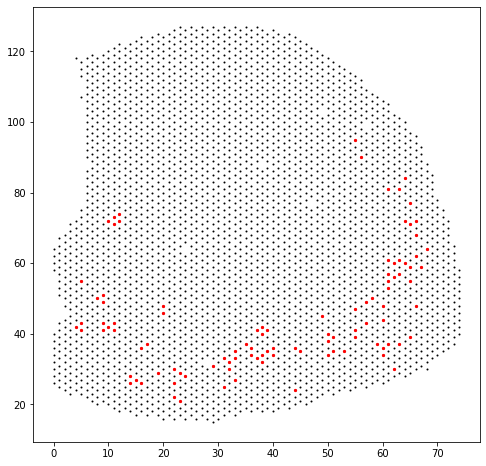

In [383]:
#PLOT PLAQUES
fig = plt.figure(figsize=(8,8))
xcoord, ycoord = spot_df['array_row'].values, spot_df['array_col'].values
plq_bool = spot_df['plaque'].values == 1

plt.scatter(xcoord, ycoord, s=1, c='k')
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=5, c='red')
plt.show()

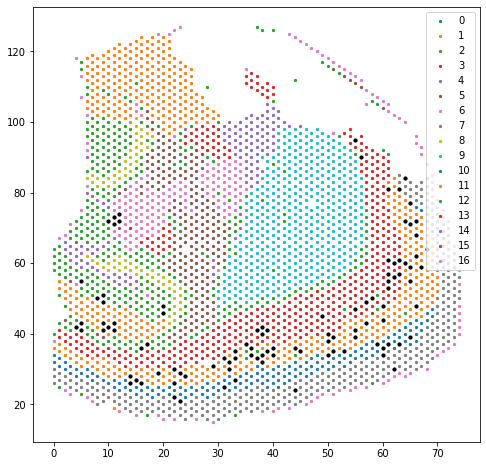

In [384]:

fig = plt.figure(figsize=(8,8))
clust_lab = spot_df['cluster'].values

for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = str(x))
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
plt.legend()
#plt.savefig('fig_dump/plaque-clusters-01.svg', transparent=True)
plt.show()


In [390]:
clust_lab

array([17, 12,  2, ...,  7,  7,  2])

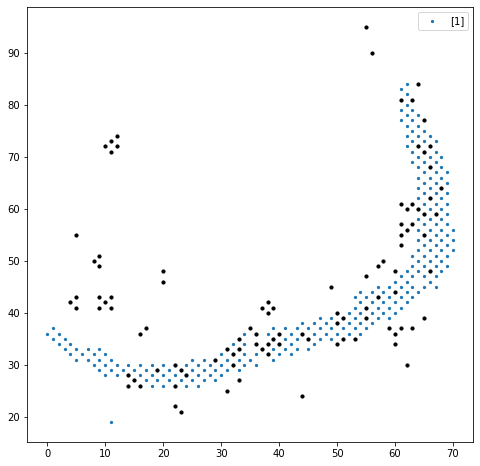

In [393]:
x=[1]
fig = plt.figure(figsize=(8,8))
plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = str(x))
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
plt.legend()
#plt.savefig('fig_dump/plaque-clusters-01.svg', transparent=True)
plt.show()


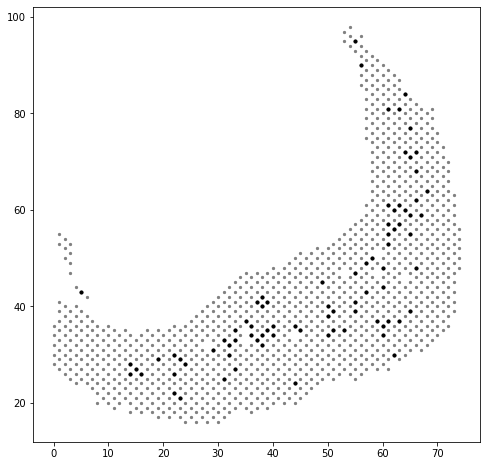

In [100]:
#Cortex plaques
cort_l = [3,6,8,9]

fig = plt.figure(figsize=(8,8))
for x in range(len(np.unique(clust_df['cluster']))): 
    if x in cort_l:
        plt.scatter(rows[row_ind[x]], cols[row_ind[x]], s=5, label = str(x), c = 'grey')
        plt.scatter(rows[np.intersect1d(np.where(plq_bool == True)[0], row_ind[x])], cols[np.intersect1d(np.where(plq_bool == True)[0], row_ind[x])], s=10, c='k')
#plt.savefig('fig_dump/plaque-clusters-cortex-01.svg', transparent=True)
plt.show()


# Plaque distribution 


In [3]:
#OLD ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



(['V11Y10_030-C',
  '030-B',
  'V11Y17_109-D',
  'V11Y17_109-A',
  'V10S15_040-C',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V10S15_040-D'],
 array(['030-C', '030-B', '109-D', '109-A', '040-C', '109-C', '030-D',
        '040-A', '040-D'], dtype='<U32'))

In [4]:
#Define colormap by clusters
col_df = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/metadata/colors.csv')
sort_clust = col_df['cluster_order'] #all clusters sorted 
sort_col = col_df['color']


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


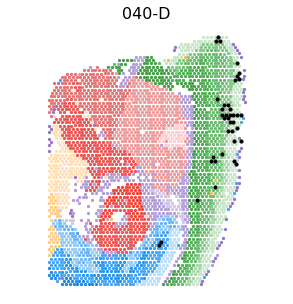

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


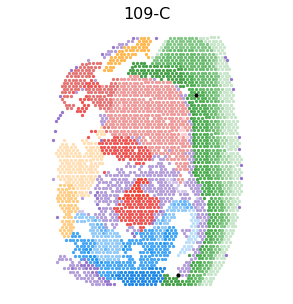

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


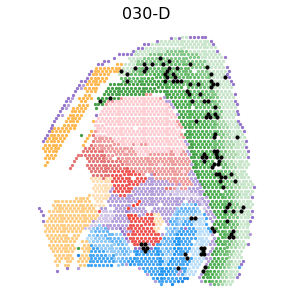

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


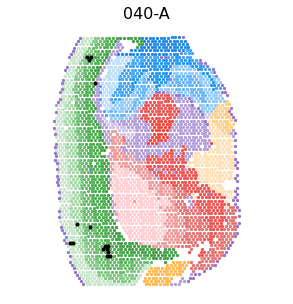

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


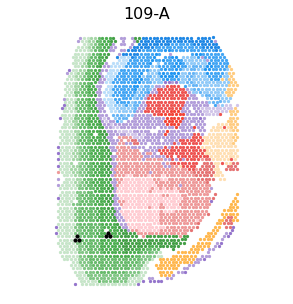

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


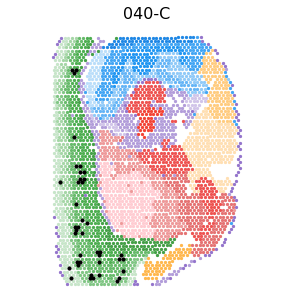

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


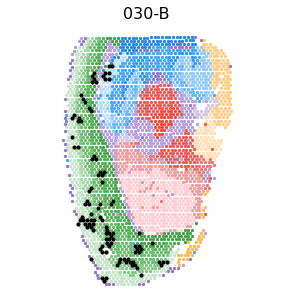

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


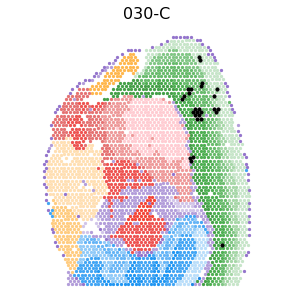

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


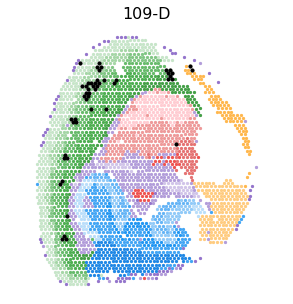

In [31]:

#plot and save all samples
for y,name in enumerate(sub_ID):
    spot_df, gene_df = run_(ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    xcoord, ycoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1


    fig,ax = plt.subplots(figsize=(5,5))
    for x in range(len(sort_clust)): 
        plt.scatter(xcoord[np.where(clust_lab==sort_clust[x])[0]], ycoord[np.where(clust_lab==sort_clust[x])[0]], s=5, label = sort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

    #remove all borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.axis('equal')
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.title(sub_ID[y], fontsize=16)
    plt.savefig(s_fig + 'plaque-clusters-' + sub_ID[y] + '.svg', transparent=True)
    plt.show()


In [9]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID[:1]):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    cat_df = pd.concat([cat_df, spot_df])

clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
# clust_df['region'] = cat_df.groupby('cluster').sum()['plaque'].index.values
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


In [10]:
clust_df

,plaque,total spots,percent of spots,percent of all plaques
cluster,,,,
Amygdala,0,146,0.00,0.00
CA1,0,65,0.00,0.00
CA3-so/sr,0,128,0.00,0.00
CA3-sp,0,70,0.00,0.00
COAa,0,279,0.00,0.00
COAp,0,110,0.00,0.00
"CTXsp (L6b, CLA, EP)",1,134,0.75,3.70
Caudoputamen,0,257,0.00,0.00
Cortex Layer 2/3,4,287,1.39,14.81


In [ ]:
df['m'] = pd.Categorical(df['m'], ["March", "April", "Dec"])

In [7]:
clust_df

,plaque,total spots,percent of spots,percent of all plaques
cluster,,,,
Amygdala,0,1142,0.00,0.00
CA1,13,518,2.51,3.41
CA3-so/sr,1,1102,0.09,0.26
CA3-sp,0,549,0.00,0.00
COAa,0,1219,0.00,0.00
COAp,0,941,0.00,0.00
"CTXsp (L6b, CLA, EP)",8,1155,0.69,2.10
Caudoputamen,0,1763,0.00,0.00
Cortex Layer 2/3,56,2372,2.36,14.70


In [12]:
clust_df.index

Index(['Amygdala', 'CA1', 'CA3-so/sr', 'CA3-sp', 'COAa', 'COAp',
       'CTXsp (L6b, CLA, EP)', 'Caudoputamen', 'Cortex Layer 2/3',
       'Cortex Layer 4', 'Cortex Layer 5a', 'Cortex Layer 5b',
       'Cortex Layer 6a', 'Dentate Gyrus-mo', 'Dentate Gyrus-sg',
       'Fiber Tracts', 'GP/TH', 'Lateral Venticle', 'Meninges',
       'Piriform Cortex', 'RHP', 'Reticular Nucleus', 'STRv'],
      dtype='object', name='cluster')

/home/dburrows/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'plaque'

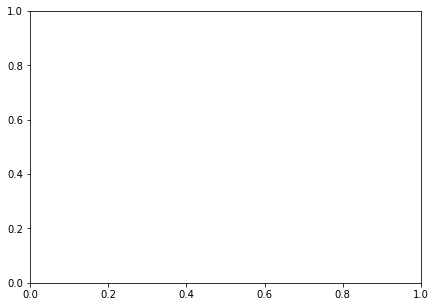

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(clust_df, x=clust_df.index, y= "plaque", palette=sort_col, order=sort_clust) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
#plt.savefig(s_fig + 'plaque-clusters-barplot.svg', transparent=True)
plt.show()

In [18]:
(spot_df.groupby('cluster').sum()['plaque']/spot_df.groupby('cluster').count()['plaque'])*100

cluster
Amygdala                 0.000000
CA1                     12.068966
CA3-so/sr                0.000000
CA3-sp                   0.000000
COAa                     0.000000
COAp                     0.000000
CTXsp (L6b, CLA, EP)     1.626016
Caudoputamen             0.000000
Cortex Layer 2/3         8.366534
Cortex Layer 4           9.876543
Cortex Layer 5a         11.607143
Cortex Layer 5b         14.732143
Cortex Layer 6a          8.235294
Dentate Gyrus-mo         0.613497
Dentate Gyrus-sg         0.000000
Fiber Tracts             0.367647
GP/TH                    0.000000
Lateral Venticle         0.000000
Meninges                 2.222222
Piriform Cortex          0.000000
RHP                      0.000000
Reticular Nucleus        0.000000
STRv                     0.000000
Name: plaque, dtype: float64

In [19]:
# Fraction of spots covered by plaque

#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_('old',ID[x], sub_ID[x])
    curr= (spot_df.groupby('cluster').sum()['plaque']/spot_df.groupby('cluster').count()['plaque'])*100
    cat_df = pd.concat([cat_df, curr])

cat_df = cat_df.reset_index()
cat_df.columns = ['cluster', 'plaque']


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


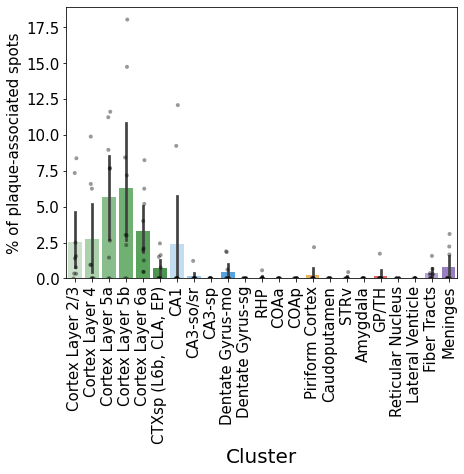

In [40]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=cat_df, x='cluster', y='plaque',palette=sort_col, order=sort_clust) 

sns.stripplot(
    x="cluster", 
    y="plaque", 
    color='k', order=sort_clust,
    data=cat_df, alpha=0.4, size=4
)

#label x axis
plt.ylabel('% of plaque-associated spots', fontsize=15)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_code + 'spatial_transcriptomics/' + 'prac.svg', transparent=True)
plt.show()

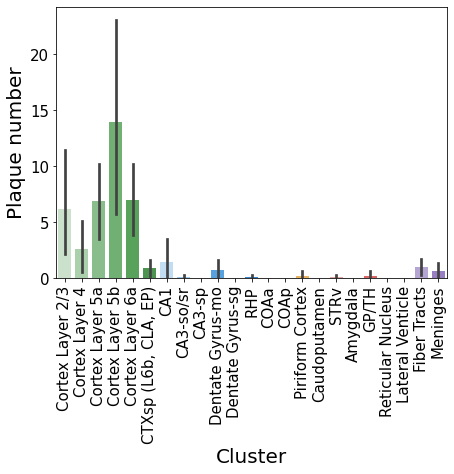

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(cat_df, x='cluster', y= "plaque", palette=sort_col, order=sort_clust) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
#plt.savefig(s_fig + 'plaque-clusters-barplot.svg', transparent=True)
plt.show()

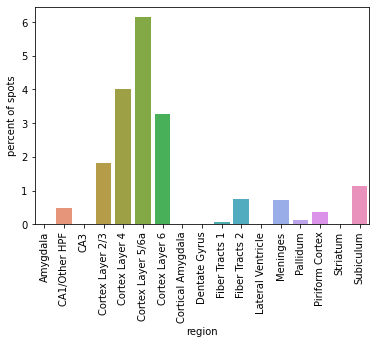

In [105]:
sns.barplot(clust_df, x='region', y= "percent of spots", order=clust_df.sort_values('region', ascending=True).region)# hue="sex", stat="probability", multiple="fill", shrink=.8)
plt.xticks(rotation=90)
plt.show()

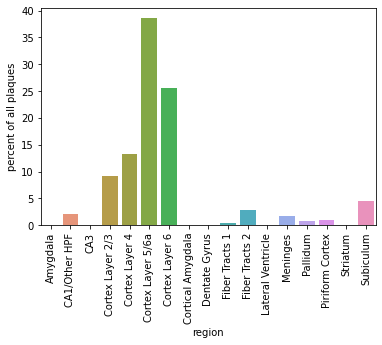

In [106]:
sns.barplot(clust_df, x='region', y= "percent of all plaques", order=clust_df.sort_values('region', ascending=True).region)# hue="sex", stat="probability", multiple="fill", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [292]:
cat_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,anot
114443,AAACAATCTACTAGCA-1,1,3,43,1036,506,0,7,Cortex Layer 2/3
114444,AAACACCAATAACTGC-1,1,59,19,1290,1553,0,8,CA3
114445,AAACAGCTTTCAGAAG-1,1,43,9,1399,1255,0,13,Cortical Amygdala
114446,AAACAGGGTCTATATT-1,1,47,13,1355,1329,0,13,Cortical Amygdala
114447,AAACAGTGTTCCTGGG-1,1,73,43,1032,1814,0,16,Meninges
...,...,...,...,...,...,...,...,...,...
138352,TTGTTTCACATCCAGG-1,1,58,42,1048,1875,0,3,Cortex Layer 6
138353,TTGTTTCATTAGTCTA-1,1,60,30,1175,1912,0,1,Cortex Layer 5/6a
138354,TTGTTTCCATACAACT-1,1,45,27,1207,1636,0,7,Cortex Layer 2/3
138355,TTGTTTGTATTACACG-1,1,73,41,1057,2151,0,1,Cortex Layer 5/6a


In [6]:
#Look at distribution of spots across sample
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
for x,name in enumerate(sub_ID):
    spot_df, gene_df = run_(ID[x], sub_ID[x])
    spot_df['sample id'] = np.full(len(spot_df), name)
    cat_df = pd.concat([cat_df, spot_df])

cat_filt = cat_df[cat_df['plaque'] == 1]
cat_filt

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,sample id
165822,AACTCCAGAGCGTGTT-1,1,60,92,510,1712,1,Cortex Layer 5a,109-D
165877,AATACCGGAGGGCTGT-1,1,67,37,1105,1846,1,Piriform Cortex,109-D
165926,ACAAGGATGCTTTAGG-1,1,61,87,564,1731,1,Cortex Layer 5b,109-D
165959,ACATGGCGCCAAAGTA-1,1,40,104,382,1335,1,Cortex Layer 5b,109-D
166019,ACGCAAACTAATAGAT-1,1,63,47,997,1770,1,"CTXsp (L6b, CLA, EP)",109-D
...,...,...,...,...,...,...,...,...,...
130476,TCACGATGTCCGTGGA-1,1,52,28,1196,1765,1,Cortex Layer 2/3,040-D
130516,TCCCAAACATCCTCTA-1,1,75,35,1121,2188,1,Cortex Layer 2/3,040-D
130571,TCGAGCCAGGCAGGCC-1,1,57,37,1101,1857,1,Cortex Layer 5b,040-D
131004,TTCTTGGACGATCTGC-1,1,52,32,1154,1765,1,Cortex Layer 5a,040-D


In [27]:
from PIL import ImageColor
rgb_l = [ImageColor.getcolor(sort_col[i], "RGBA") for i in range(len(sort_col))]
rgb_l=np.asarray(rgb_l) / 255

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


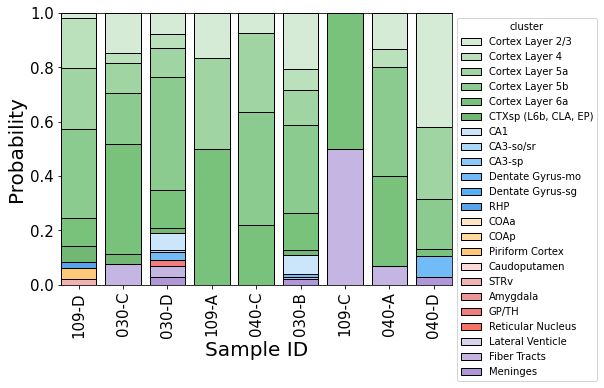

In [29]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(cat_filt, x="sample id", hue="cluster", hue_order = sort_clust, palette=rgb_l, stat='probability', multiple="fill", shrink=.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Sample ID', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-clusters-propplot.svg', transparent=True)
plt.show()

In [41]:
cort_clust = sort_clust[:5]
cort_clust

0    Cortex Layer 2/3
1      Cortex Layer 4
2     Cortex Layer 5a
3     Cortex Layer 5b
4     Cortex Layer 6a
Name: cluster_order, dtype: object

In [306]:
#Find shortest path right_most and left_most points in layer 2-3
#-----------------------------------------------
def add_edge(graph, my_coords, nn):
    #compute distances between all points
    #-----------------------------------------------

    from sklearn.neighbors import NearestNeighbors
    #find the n nearest neighbours
    X = np.asarray(my_coords)
    nbrs = NearestNeighbors(n_neighbors=nn, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = distances[:,1:]
    indices = indices[:,1:]

    #fill in graph
    edges = list(range(distances.shape[0]*distances.shape[1]))
    count=0
    for i in range(distances.shape[0]):
        for e in range(distances.shape[1]):
            edges[count] = (str(i), str(indices[i,e]), 1/distances[i,e])
            count+=1
    for edge in edges:
        graph.add_edge(*edge)
    return(graph)

#Calculate R->C ratio
def nn_check(X, new_path):
    nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = distances[:,1:]
    indices = indices[:,1:]
    norm_dist = indices[0][0]/len(new_path) 
    if norm_dist == 0:
        norm_dist = indices[0][1]/len(new_path) 
    return(norm_dist)

In [308]:
dist_v

array([0.70422535, 0.64788732, 0.50704225, 0.84507042, 0.81690141,
       1.        , 0.69014085, 0.6056338 , 0.49295775, 0.32394366,
       0.67605634, 0.4084507 , 0.61971831, 0.64788732, 0.67605634,
       0.8028169 , 0.61971831, 0.98591549, 0.49295775, 0.57746479,
       0.8028169 , 0.70422535, 0.49295775, 0.69014085, 0.49295775,
       0.66197183, 0.66197183, 0.83098592, 0.52112676, 0.67605634,
       0.97183099, 0.73239437, 0.66197183, 0.64788732])

In [310]:
1-dist_v

array([0.29577465, 0.35211268, 0.49295775, 0.15492958, 0.18309859,
       0.        , 0.30985915, 0.3943662 , 0.50704225, 0.67605634,
       0.32394366, 0.5915493 , 0.38028169, 0.35211268, 0.32394366,
       0.1971831 , 0.38028169, 0.01408451, 0.50704225, 0.42253521,
       0.1971831 , 0.29577465, 0.50704225, 0.30985915, 0.50704225,
       0.33802817, 0.33802817, 0.16901408, 0.47887324, 0.32394366,
       0.02816901, 0.26760563, 0.33802817, 0.35211268])

In [309]:
name
invert_name = ['030-B', '109-A', '040-C', '040-A']
if name in invert_name:
    dist_v = 1-dist_v

'040-D'

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


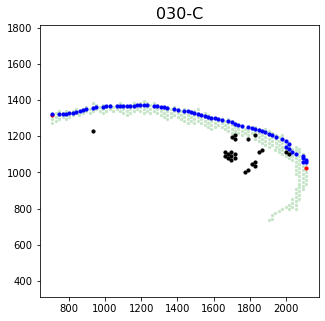

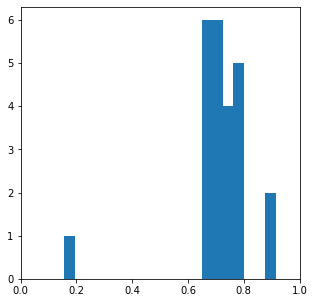

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2835
Number of genes: 32284


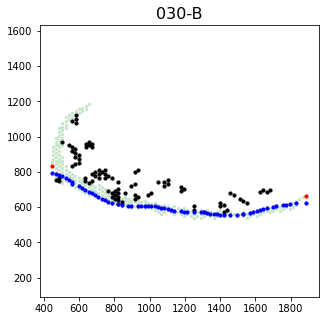

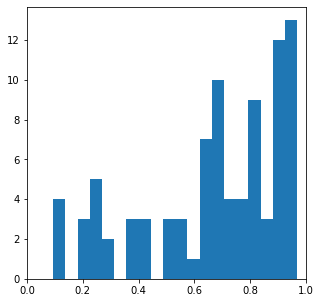

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2959
Number of genes: 32284


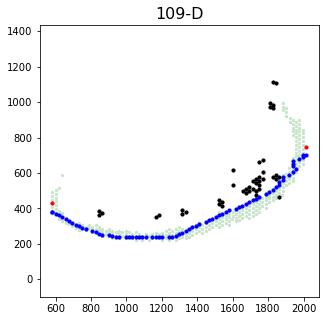

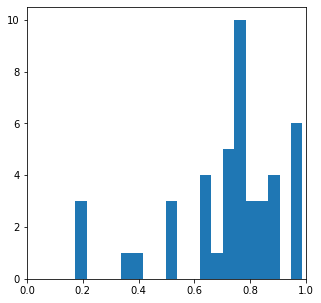

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3204
Number of genes: 32284


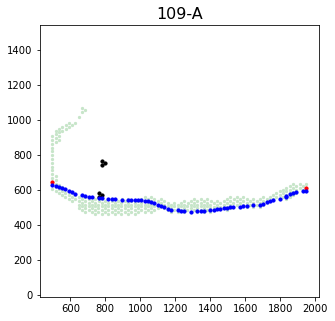

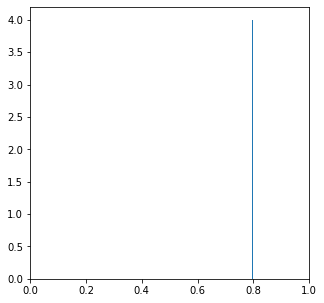

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3406
Number of genes: 32284


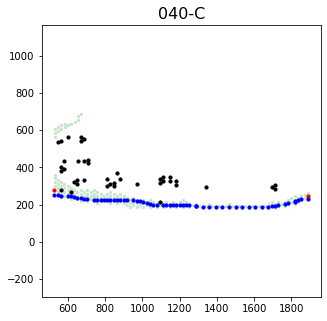

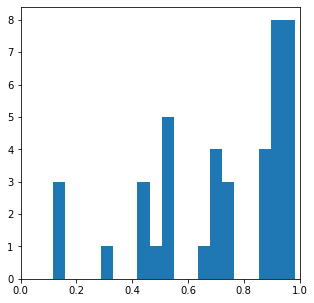

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3002
Number of genes: 32284


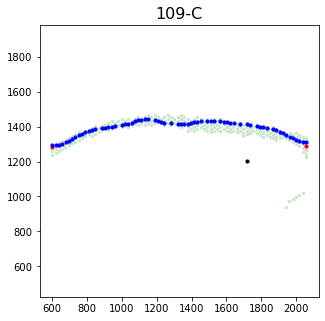

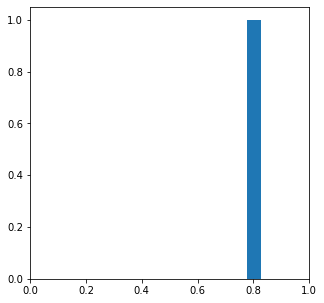

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2998
Number of genes: 32284


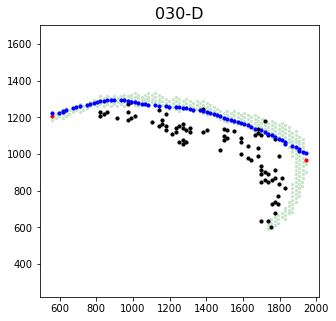

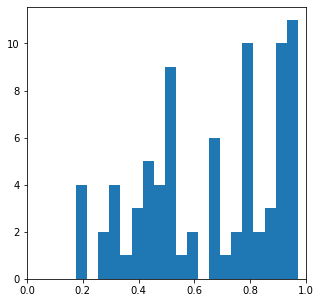

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3343
Number of genes: 32284


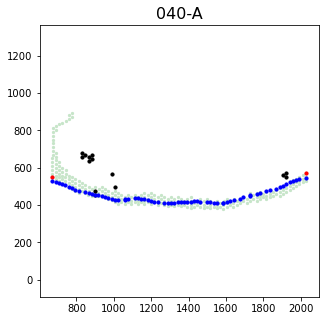

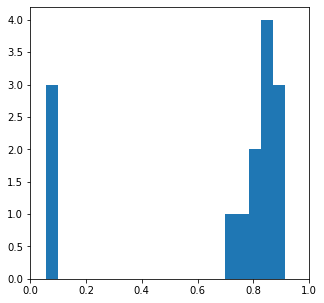

/home/dburrows/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


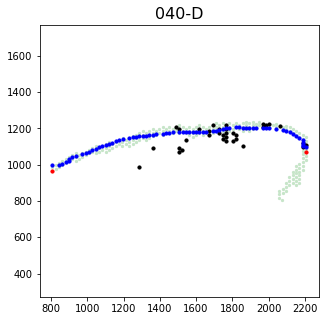

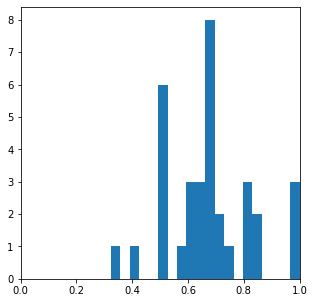

In [311]:
invert_name = ['030-B', '109-A', '040-C', '040-A']
samp_l = list(range(len(sub_ID)))
#plot and save all samples
for y,name in enumerate(sub_ID):
    #plot and save all samples
    spot_df, gene_df = run_('old',ID[y], sub_ID[y])
    clust_lab = spot_df['cluster'].values
    ycoord, xcoord = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values
    plq_bool = spot_df['plaque'].values == 1
    plq_bool = np.intersect1d(np.argwhere(plq_bool), [i for i in range(len(spot_df['cluster'])) if 'Cortex' in spot_df['cluster'].values[i]])


    fig,ax = plt.subplots(figsize=(5,5))
    #only do top cortex cluster
    x=0
    plt.scatter(xcoord[np.where(clust_lab==cort_clust[x])[0]], ycoord[np.where(clust_lab==cort_clust[x])[0]], s=5, label = cort_clust[x], color = sort_col[x], alpha=1)
    plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    curr_x = xcoord[np.where(clust_lab==cort_clust[x])[0]]
    curr_y = ycoord[np.where(clust_lab==cort_clust[x])[0]]
    right_most = np.max(curr_x)
    left_most = np.min(curr_x)
    
    #find shortest path length
    end_ind, start_ind = str(np.where(curr_x==right_most)[0][0]),str(np.where(curr_x==left_most)[0][0])
    my_coords = np.vstack((curr_x,curr_y)).T
    graph = pf.Graph()
    graph = add_edge(graph,my_coords, 5)
    path = pf.dijsktra(graph, start_ind, end_ind)


    #color right_most and left_most point
    plt.scatter(right_most, curr_y[np.where(curr_x==right_most)[0]][0],s=10, c='r')
    plt.scatter(left_most, curr_y[np.where(curr_x==left_most)[0]][0],  s=10, c='r')

    #color shortest path and gaussian smooth in y
    path_x, path_y = curr_x[[int(i) for i in path]], curr_y[[int(i) for i in path]]
    arr = np.asarray(np.vstack((path_x, path_y)).T)
    arr = arr.astype('int32')
    new_arr= scipy.ndimage.gaussian_filter(arr[:,1], sigma=3)

    plt.scatter(path_x, new_arr, s=10, c='blue')

    #remove all borders
    ax.axis('equal')
    plt.title(sub_ID[y], fontsize=16)
    plt.show()

    
    #Calculate distances R-> C
    dist_v = []
    new_path = np.vstack((path_x, new_arr)).T
    new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
    for p in new_plq:
        dist_v = np.append(dist_v,nn_check(np.vstack((p,new_path)), new_path))
        
    if name in invert_name:
        dist_v = 1-dist_v
    samp_l[y] = dist_v
    fig,ax = plt.subplots(figsize=(5,5))
    plt.hist(dist_v, bins=20)
    plt.xlim(0,1)
    plt.show()

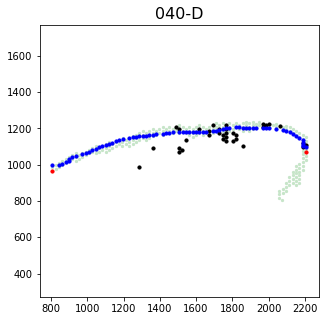

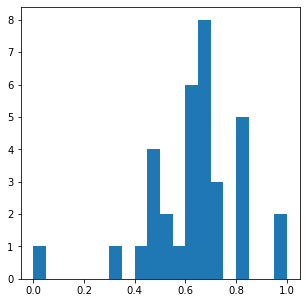

In [276]:
fig,ax = plt.subplots(figsize=(5,5))
#only do top cortex cluster
x=0
plt.scatter(xcoord[np.where(clust_lab==cort_clust[x])[0]], ycoord[np.where(clust_lab==cort_clust[x])[0]], s=5, label = cort_clust[x], color = sort_col[x], alpha=1)
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
curr_x = xcoord[np.where(clust_lab==cort_clust[x])[0]]
curr_y = ycoord[np.where(clust_lab==cort_clust[x])[0]]
right_most = np.max(curr_x)
left_most = np.min(curr_x)

end_ind, start_ind = str(np.where(curr_x==right_most)[0][0]),str(np.where(curr_x==left_most)[0][0])
my_coords = np.vstack((curr_x,curr_y)).T
graph = pf.Graph()
graph = add_edge(graph,my_coords, 5)
path = pf.dijsktra(graph, start_ind, end_ind)


#color right_most and left_most point
plt.scatter(right_most, curr_y[np.where(curr_x==right_most)[0]][0],s=10, c='r')
plt.scatter(left_most, curr_y[np.where(curr_x==left_most)[0]][0],  s=10, c='r')

path_x, path_y = curr_x[[int(i) for i in path]], curr_y[[int(i) for i in path]]
arr = np.asarray(np.vstack((path_x, path_y)).T)
arr = arr.astype('int32')
new_arr= scipy.ndimage.gaussian_filter(arr[:,1], sigma=3)

plt.scatter(path_x, new_arr, s=10, c='blue')

#remove all borders
ax.axis('equal')
plt.title(sub_ID[y], fontsize=16)
plt.show()


#Calculate distances R-> C
dist_v = []
new_path = np.vstack((path_x, new_arr)).T
new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
for p in new_plq:
    dist_v = np.append(dist_v,nn_check(np.vstack((p,new_path)), new_path))
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(dist_v, bins=20)
plt.show()


In [277]:
dist_v

array([0.70422535, 0.64788732, 0.50704225, 0.84507042, 0.81690141,
       1.        , 0.69014085, 0.6056338 , 0.49295775, 0.32394366,
       0.67605634, 0.4084507 , 0.61971831, 0.64788732, 0.67605634,
       0.8028169 , 0.61971831, 0.98591549, 0.49295775, 0.57746479,
       0.8028169 , 0.70422535, 0.49295775, 0.69014085, 0.49295775,
       0.66197183, 0.66197183, 0.83098592, 0.52112676, 0.67605634,
       0.        , 0.73239437, 0.66197183, 0.64788732])

In [280]:
dist_v = []

new_path = np.vstack((path_x, new_arr)).T
new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
for p in new_plq:
    dist_v = np.append(dist_v,nn_check(np.vstack((p,new_path)), new_path))

In [291]:
new_plq[np.where(dist_v == 0)[0][0]]

array([2188, 1121], dtype=object)

In [293]:
new_path = np.vstack((path_x, new_arr)).T
new_plq = np.vstack((xcoord[plq_bool],ycoord[plq_bool])).T
my_check =new_plq[np.where(dist_v == 0)[0][0]]
X = np.vstack((my_check,new_path))

In [304]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances = distances[:,1:]
indices = indices[:,1:]
norm_dist = indices[0][0]/len(new_path) 
if norm_dist == 0:
    norm_dist = indices[0][1]/len(new_path) 


In [305]:
norm_dist

0.971830985915493

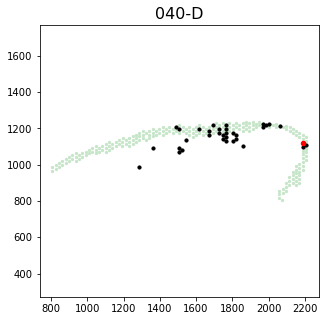

In [290]:
fig,ax = plt.subplots(figsize=(5,5))
#only do top cortex cluster
x=0
plt.scatter(xcoord[np.where(clust_lab==cort_clust[x])[0]], ycoord[np.where(clust_lab==cort_clust[x])[0]], s=5, label = cort_clust[x], color = sort_col[x], alpha=1)
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
plt.scatter(new_plq[np.where(dist_v == 0)[0][0]][0], new_plq[np.where(dist_v == 0)[0][0]][1], s=20, c='red')

curr_x = xcoord[np.where(clust_lab==cort_clust[x])[0]]
curr_y = ycoord[np.where(clust_lab==cort_clust[x])[0]]
right_most = np.max(curr_x)
left_most = np.min(curr_x)

end_ind, start_ind = str(np.where(curr_x==right_most)[0][0]),str(np.where(curr_x==left_most)[0][0])
my_coords = np.vstack((curr_x,curr_y)).T
graph = pf.Graph()
graph = add_edge(graph,my_coords, 5)
path = pf.dijsktra(graph, start_ind, end_ind)


#color right_most and left_most point
# plt.scatter(right_most, curr_y[np.where(curr_x==right_most)[0]][0],s=10, c='r')
# plt.scatter(left_most, curr_y[np.where(curr_x==left_most)[0]][0],  s=10, c='r')

path_x, path_y = curr_x[[int(i) for i in path]], curr_y[[int(i) for i in path]]
arr = np.asarray(np.vstack((path_x, path_y)).T)
arr = arr.astype('int32')
new_arr= scipy.ndimage.gaussian_filter(arr[:,1], sigma=3)

#plt.scatter(path_x, new_arr, s=10, c='blue')


#plt.scatter(new_plq[np.where(dist_v == 0)[0][0]][0], new_plq[np.where(dist_v == 0)[0][0]][1], s=20, c='red')

#remove all borders
ax.axis('equal')
plt.title(sub_ID[y], fontsize=16)
plt.show()




In [245]:
norm_dist

0.704225352112676

In [ ]:
#Convert into normalised R/C score


#Plot for each animal a distribution

In [ ]:
#YOUNG ANIMALS
#sort out names
import glob
import os
age = 'old'
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/' + age)
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 1: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID



# Compare adjacent slices for gene expression

In [78]:
og_df, og_gene_df = run_('030-B')
clust_lab = og_df['cluster'].values
reg_lab = np.asarray(og_df.groupby('cluster').first()['anot'])

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 12404


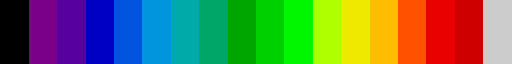

In [79]:
#Choose colormap
cmap = plt.get_cmap("nipy_spectral", len(np.unique(reg_lab))+1)
cmap

In [99]:
distances

array([[21.        , 21.09502311, 21.47091055, ..., 36.7151195 ,
        37.21558813, 37.21558813],
       [21.09502311, 21.09502311, 21.9544984 , ..., 37.21558813,
        38.        , 42.54409477],
       [21.        , 21.09502311, 21.09502311, ..., 37.        ,
        37.21558813, 37.21558813],
       ...,
       [21.        , 21.9544984 , 21.9544984 , ..., 43.        ,
        43.41658669, 43.9089968 ],
       [21.02379604, 21.9544984 , 21.9544984 , ..., 43.01162634,
        43.0464865 , 43.41658669],
       [20.59126028, 21.        , 21.09502311, ..., 37.        ,
        37.21558813, 37.21558813]])

In [100]:
1/distances

array([[0.04761905, 0.04740455, 0.04657464, ..., 0.02723674, 0.02687046,
        0.02687046],
       [0.04740455, 0.04740455, 0.04554875, ..., 0.02687046, 0.02631579,
        0.02350502],
       [0.04761905, 0.04740455, 0.04740455, ..., 0.02702703, 0.02687046,
        0.02687046],
       ...,
       [0.04761905, 0.04554875, 0.04554875, ..., 0.02325581, 0.02303267,
        0.02277438],
       [0.04756515, 0.04554875, 0.04554875, ..., 0.02324953, 0.0232307 ,
        0.02303267],
       [0.04856429, 0.04761905, 0.04740455, ..., 0.02702703, 0.02687046,
        0.02687046]])

In [80]:
name = '030-B'
data_path = s_data + 'spatial_transcriptomics/plaques/' + name + 'X.json'
coord_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/spatial/tissue_positions.csv'
genes_path = '/cndd2/agelber/hal/qc_aligned/' + name + '/outs/filtered_feature_bc_matrix.h5'
meta = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/allspots_meta.csv') #FILTERED
meta_filt = meta[meta['sample'] == name]

spot_df, gene_df = pf.sort_data(data_path, coord_path, genes_path, 
                                meta_filt, min_cell_per_gene=100, norm_factor=1e6)

#Sanity check
assert spot_df.shape[0] == gene_df.shape[0] == meta_filt.shape[0]
assert 'Thy1' not in gene_df.columns.values or 'humanAPP' not in gene_df.columns.values
print('Number of spots: ' + str(gene_df.shape[0]))
print('Number of genes: ' + str(gene_df.shape[1]))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 12404


In [58]:
#plot and save all samples

xcoord, ycoord = spot_df['array_row'].values, spot_df['array_col'].values
plq_bool = spot_df['plaque'].values == 1


fig,ax = plt.subplots(figsize=(5,5))
for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = reg_lab[x], color = cmap(x+1), alpha=1)
plt.scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, markerscale=2)

#remove all borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.savefig(s_fig + 'plaque-clusters-' + name + '.svg', transparent=True)
plt.show()


(2939,)

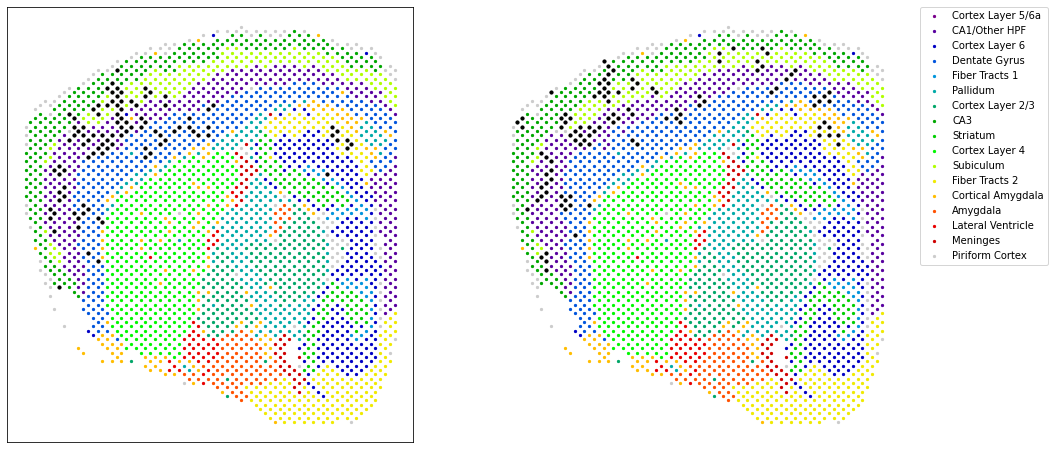

In [84]:
#PLOT PLAQUES
data_l = og_df, spot_df
fig,ax = plt.subplots(1, 2, figsize=(16,8))

for i,data in enumerate(data_l):
    xcoord, ycoord = data['array_row'].values, data['array_col'].values
    plq_bool = data['plaque'].values == 1
    clust_lab = data['cluster'].values
    for x in range(len(np.unique(clust_lab))): 
        ax[i].scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = reg_lab[x], color = cmap(x+1), alpha=1)
    ax[i].scatter(xcoord[plq_bool], ycoord[plq_bool], s=10, c='k')
    ax[i].xaxis.set_tick_params(labelbottom=False)
    ax[i].yaxis.set_tick_params(labelleft=False)
    ax[i].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [127]:
#original ordering of cluster
col_ord = og_df.groupby('cluster').first()['anot']

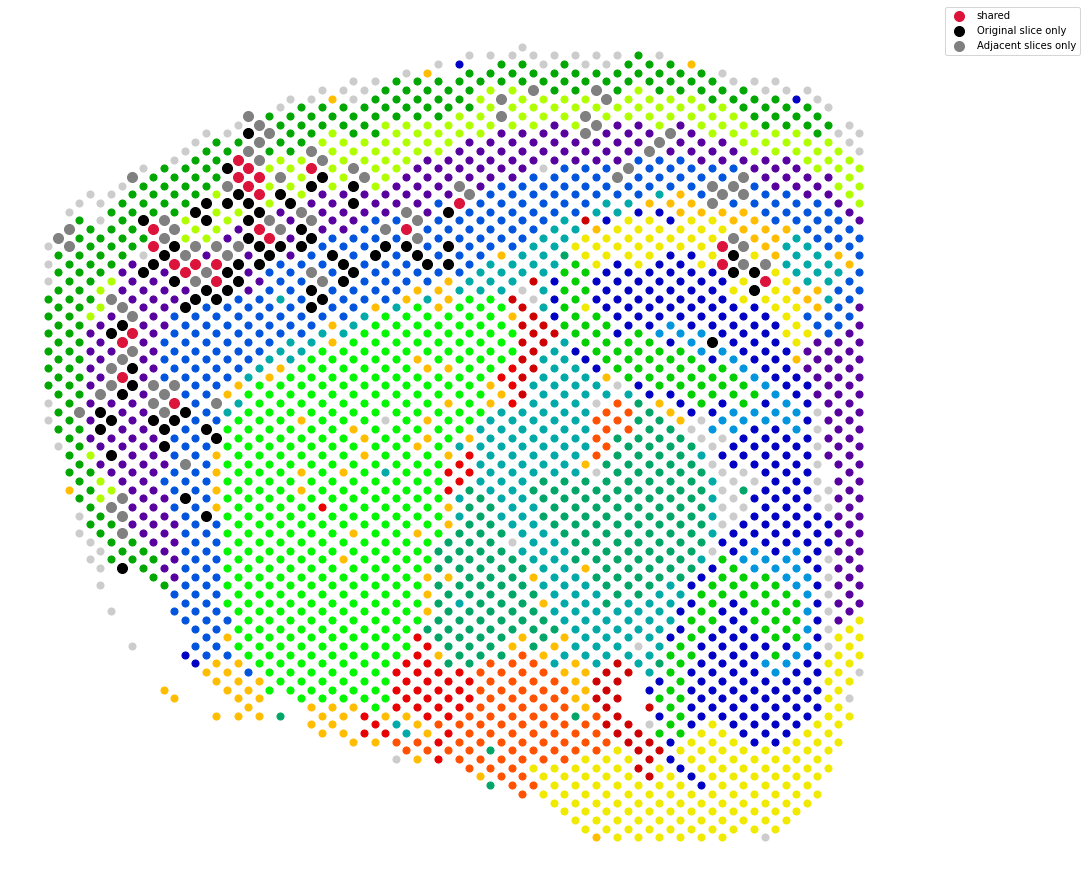

In [553]:
#PLOT OVERLAPPING PLAQUES
og_plq = np.where(og_df['plaque']==1)[0]
new_plq = np.where(spot_df['plaque']==1)[0]
shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)

assert len(og_plq) == len(og_notin) + len(shared)
assert len(new_plq) == len(new_notin) + len(shared)
data = og_df

fig,ax = plt.subplots(figsize=(16,16))
xcoord, ycoord = data['array_row'].values, data['array_col'].values
plq_bool = data['plaque'].values == 1
clust_lab = data['cluster'].values
for x in range(len(np.unique(clust_lab))): 
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=50, color = cmap(x+1), alpha=1)

plt.scatter(xcoord[shared], ycoord[shared], s=100, c='crimson', label='shared')
plt.scatter(xcoord[og_notin], ycoord[og_notin], s=100, c='k', label='Original slice only')
plt.scatter(xcoord[new_notin], ycoord[new_notin], s=100, c='grey', label='Adjacent slices only')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(s_fig + 'plaque-overlap.svg', transparent=True)
plt.show()


In [76]:
#find euclidean distance between all points
my_coords = np.vstack((curr_x, curr_y)).T
len(my_coords)

287

In [ ]:
[]

In [341]:
cort_l = 'Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6'

In [433]:
cort_l

('Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6')

In [435]:
clust_lab

array(['Cortex Layer 2/3', 'CA3', 'Cortical Amygdala', ..., 'Pallidum',
       'Meninges', 'Cortex Layer 5/6a'], dtype=object)

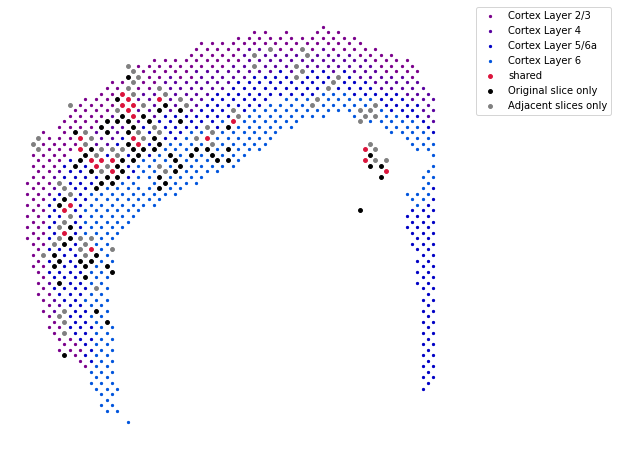

In [436]:
#PLOT OVERLAPPING PLAQUES
og_plq = np.where(og_df['plaque']==1)[0]
new_plq = np.where(spot_df['plaque']==1)[0]
shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)

assert len(og_plq) == len(og_notin) + len(shared)
assert len(new_plq) == len(new_notin) + len(shared)
data = og_df

fig,ax = plt.subplots(figsize=(8,8))
xcoord, ycoord = data['array_row'].values, data['array_col'].values
plq_bool = data['plaque'].values == 1
clust_lab = data['anot'].values
for y,x in enumerate(cort_l):
    plt.scatter(xcoord[np.where(clust_lab==x)[0]], ycoord[np.where(clust_lab==x)[0]], s=5, label = x, color = cmap(y+1), alpha=1)

plt.scatter(xcoord[shared], ycoord[shared], s=15, c='crimson', label='shared')
plt.scatter(xcoord[og_notin], ycoord[og_notin], s=15, c='k', label='Original slice only')
plt.scatter(xcoord[new_notin], ycoord[new_notin], s=15, c='grey', label='Adjacent slices only')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [137]:
new_ord_col = [col_v[np.where(np.unique(cat_filt['anot'])[i] == col_ord)[0][0]] for i in range(len(np.unique(cat_filt['anot'])))]
new_ord_col

[(0.0, 0.6510058823529412, 0.40781764705882395, 1.0),
 (0.0, 0.9686352941176471, 0.0, 1.0),
 (0.4784529411764706, 0.0, 0.5450705882352941, 1.0),
 (0.0, 0.0, 0.7725823529411764, 1.0),
 (0.9411470588235293, 0.9176176470588236, 0.0, 1.0),
 (0.6901647058823523, 1.0, 0.0, 1.0)]

<ipython-input-554-ed3b8b8a1c29>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


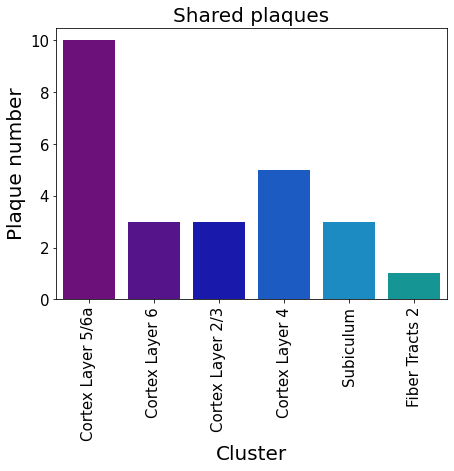

In [554]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = og_df.iloc[shared]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)


fig, ax = plt.subplots(figsize=(7,5))
plt.title('Shared plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque", palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-overlap-barplot.svg', transparent=True)
plt.show()

<ipython-input-555-27b705883cfc>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


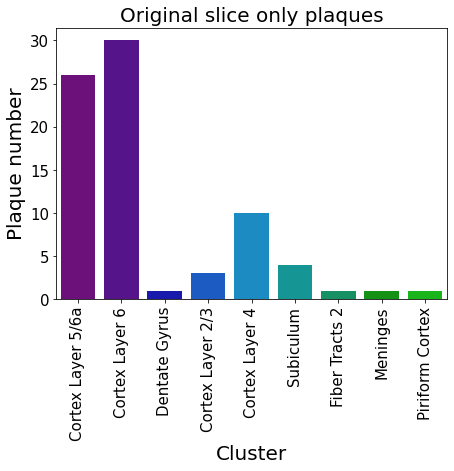

In [555]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = og_df.iloc[og_notin]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Original slice only plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque",palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-sliceonly-barplot.svg', transparent=True)
plt.show()

<ipython-input-556-f1dee2f2b8ed>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']


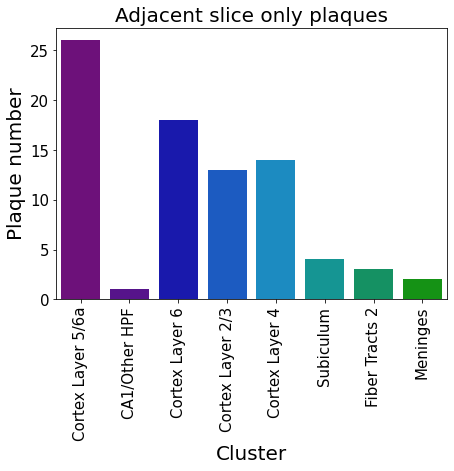

In [556]:
#Look at distribution of plaques across clusters
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()

cat_df = spot_df.iloc[new_notin]
clust_df['plaque'] = cat_df.groupby('cluster').sum()['plaque']
clust_df['region'] = cat_df.groupby('cluster').first()['anot']
clust_df['total spots'] = cat_df.groupby('cluster').count()['plaque']
clust_df['percent of spots'] = clust_df['plaque']/clust_df['total spots'] *100
clust_df['percent of spots'] = clust_df['percent of spots'].round(2)
clust_df['percent of all plaques'] = clust_df['plaque']/clust_df['plaque'].sum() *100
clust_df['percent of all plaques'] = clust_df['percent of all plaques'].round(2)

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Adjacent slice only plaques', fontsize=20)
sns.barplot(clust_df, x='region', y= "plaque",palette=col_v)# order=clust_df.sort_values('region', ascending=True).region, palette=z) 
#label x axis
plt.ylabel('Plaque number', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(s_fig + 'plaque-adjacentonly-barplot.svg', transparent=True)
plt.show()

In [144]:
#Look at distribution of spots across sample
#-----------------------------------------------
cat_df=pd.DataFrame()
clust_df=pd.DataFrame()
data_l = og_df, spot_df
name_l = 'Original', 'Adjacent'

for x,data in enumerate(data_l):
    data['sample id'] = np.full(len(data), name_l[x])
    cat_df = pd.concat([cat_df, data])


In [145]:
cat_filt = cat_df[cat_df['plaque'] == 1]
cat_filt

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,anot,sample id
114462,AAAGACCCAAGTCGCG-1,1,10,48,982,637,1,3,Cortex Layer 6,Original
114490,AACACGACTGTACTGA-1,1,9,65,799,617,1,1,Cortex Layer 5/6a,Original
114505,AACCGAGCTTGGTCAT-1,1,24,70,745,897,1,1,Cortex Layer 5/6a,Original
114506,AACCGTTGTGTTTGCT-1,1,12,64,810,674,1,1,Cortex Layer 5/6a,Original
114526,AACTGATATTAGGCCT-1,1,16,66,788,748,1,1,Cortex Layer 5/6a,Original
...,...,...,...,...,...,...,...,...,...,...
117236,TTATATTTGGCAATCC-1,1,26,64,809,935,1,3,Cortex Layer 6,Adjacent
117261,TTCATGGCGCAACAGG-1,1,19,75,691,804,1,10,Cortex Layer 4,Adjacent
117301,TTCTTCCCTTTGATAT-1,1,2,70,746,486,1,7,Cortex Layer 2/3,Adjacent
117352,TTGGGAAGACGAGCCG-1,1,68,64,807,1720,1,11,Subiculum,Adjacent


In [121]:
new_ord_col = [col_v[np.where(np.unique(cat_filt['anot'])[i] == cat_df.groupby('cluster').first()['anot'])[0][0]] for i in range(len(np.unique(cat_filt['anot'])))]
new_ord_col

[(0.3450764705882353, 0.0, 0.6235411764705882, 1.0),
 (0.0, 0.6510058823529412, 0.40781764705882395, 1.0),
 (0.0, 0.9686352941176471, 0.0, 1.0),
 (0.4784529411764706, 0.0, 0.5450705882352941, 1.0),
 (0.0, 0.0, 0.7725823529411764, 1.0),
 (0.0, 0.329435294117647, 0.8667, 1.0),
 (0.9411470588235293, 0.9176176470588236, 0.0, 1.0),
 (0.8117705882352941, 0.0, 0.0, 1.0),
 (0.8, 0.8, 0.8, 1.0),
 (0.6901647058823523, 1.0, 0.0, 1.0)]

<ipython-input-557-19a54b62beaa>:2: UserWarning: The palette list has more values (17) than needed (10), which may not be intended.
  sns.histplot(cat_filt, x="sample id", hue="anot", hue_order = np.unique(cat_filt['anot']),palette=col_v, stat='probability', multiple="fill", shrink=.8)


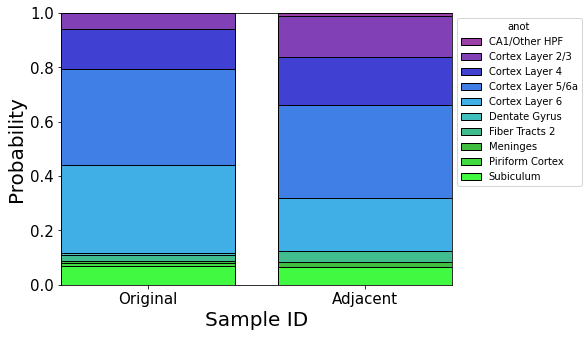

In [557]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(cat_filt, x="sample id", hue="anot", hue_order = np.unique(cat_filt['anot']),palette=col_v, stat='probability', multiple="fill", shrink=.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Sample ID', fontsize=20)
# change tick label size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=0)
plt.savefig(s_fig + 'plaque-overlap-propplot.svg', transparent=True)
plt.show()


In [169]:
## Correlate gene expression
og_filt = og_gene_df.loc[(og_df['plaque'] == 1).values]
new_filt = gene_df.loc[(spot_df['plaque'] == 1).values]
no_filt = gene_df.loc[(spot_df['plaque'] == 0).values]
og_filt

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,...,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,Spry3,Tmlhe,AC149090.1
AAAGACCCAAGTCGCG-1,0.0,66.577896,0.000000,199.733688,0.000000,0.000000,0.0,66.577896,0.0,66.577896,...,532.623169,8788.282227,1464.713745,133.155792,14580.559570,0.000000,66.577896,66.577896,0.0,266.311584
AACACGACTGTACTGA-1,0.0,74.537865,74.537865,0.000000,0.000000,0.000000,0.0,74.537865,0.0,0.000000,...,447.227173,17814.548828,2012.522339,74.537865,23703.041016,74.537865,0.000000,0.000000,0.0,149.075729
AACCGAGCTTGGTCAT-1,0.0,0.000000,0.000000,0.000000,0.000000,283.559235,0.0,170.135529,0.0,56.711845,...,283.559235,10378.267578,1587.931641,56.711845,16106.164062,0.000000,56.711845,56.711845,0.0,226.847382
AACCGTTGTGTTTGCT-1,0.0,0.000000,81.294205,0.000000,0.000000,162.588409,0.0,0.000000,0.0,0.000000,...,243.882614,7153.890137,975.530457,0.000000,12681.895508,0.000000,0.000000,0.000000,0.0,0.000000
AACTGATATTAGGCCT-1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,192.752502,0.0,64.250832,...,257.003326,13364.172852,1991.775757,0.000000,16319.710938,0.000000,64.250832,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAATCAGTACGTCAG-1,0.0,63.799919,63.799919,63.799919,127.599838,127.599838,0.0,127.599838,0.0,0.000000,...,255.199677,10016.586914,1594.997925,191.399750,15120.581055,0.000000,63.799919,0.000000,0.0,382.799500
TTCATGGCGCAACAGG-1,0.0,104.047455,34.682484,69.364967,0.000000,208.094910,0.0,0.000000,0.0,173.412415,...,485.554779,14115.770508,1907.536621,34.682484,18208.304688,0.000000,0.000000,0.000000,0.0,277.459869
TTCGGTACTGTAGAGG-1,0.0,0.000000,0.000000,0.000000,0.000000,469.836487,0.0,0.000000,0.0,93.967300,...,375.869202,14283.029297,1597.444092,0.000000,16914.113281,0.000000,93.967300,0.000000,0.0,93.967300
TTGGGAAGACGAGCCG-1,0.0,242.522232,242.522232,161.681488,80.840744,161.681488,0.0,161.681488,0.0,80.840744,...,404.203735,18270.007812,2344.381592,161.681488,21665.320312,0.000000,0.000000,0.000000,0.0,242.522232


In [160]:
new_filt

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,...,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,Spry3,Tmlhe,AC149090.1
AAAGTCACTGATGTAA-1,0.0,0.000000,55.361790,166.085373,0.000000,55.361790,0.0,166.085373,0.000000,55.361790,...,221.447159,7141.670898,719.703247,110.723579,10961.634766,0.0,0.000000,0.000000,0.0,387.532532
AACTGATATTAGGCCT-1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,192.752502,0.000000,64.250832,...,257.003326,13364.172852,1991.775757,0.000000,16319.710938,0.0,64.250832,0.000000,0.0,0.000000
AATCGGGACACTACGA-1,0.0,337.609741,0.000000,0.000000,0.000000,225.073151,0.0,112.536575,0.000000,0.000000,...,225.073151,12379.023438,2025.658325,0.000000,20256.583984,0.0,0.000000,0.000000,0.0,225.073151
AATTCGATTCGAGGAT-1,0.0,0.000000,0.000000,147.666870,0.000000,0.000000,0.0,0.000000,0.000000,147.666870,...,147.666870,10632.014648,1772.002441,147.666870,12256.350586,0.0,147.666870,0.000000,0.0,147.666870
ACACACTTTCTACACG-1,0.0,305.841553,0.000000,0.000000,0.000000,203.894379,0.0,0.000000,0.000000,101.947189,...,203.894379,5097.359375,1019.471924,0.000000,10092.771484,0.0,101.947189,101.947189,0.0,101.947189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTATATTTGGCAATCC-1,0.0,0.000000,0.000000,74.638008,0.000000,74.638008,0.0,0.000000,0.000000,74.638008,...,597.104065,9031.199219,821.018066,74.638008,11792.805664,0.0,0.000000,0.000000,0.0,74.638008
TTCATGGCGCAACAGG-1,0.0,104.047455,34.682484,69.364967,0.000000,208.094910,0.0,0.000000,0.000000,173.412415,...,485.554779,14115.770508,1907.536621,34.682484,18208.304688,0.0,0.000000,0.000000,0.0,277.459869
TTCTTCCCTTTGATAT-1,0.0,0.000000,85.048477,0.000000,0.000000,170.096954,0.0,0.000000,0.000000,85.048477,...,425.242371,11821.738281,1615.921021,85.048477,20921.925781,0.0,0.000000,0.000000,0.0,0.000000
TTGGGAAGACGAGCCG-1,0.0,242.522232,242.522232,161.681488,80.840744,161.681488,0.0,161.681488,0.000000,80.840744,...,404.203735,18270.007812,2344.381592,161.681488,21665.320312,0.0,0.000000,0.000000,0.0,242.522232


In [170]:
new_m = np.asarray(new_filt)
old_m = np.asarray(og_filt)
no_m = np.asarray(no_filt)
new_m.shape, old_m.shape

((106, 12404), (102, 12404))

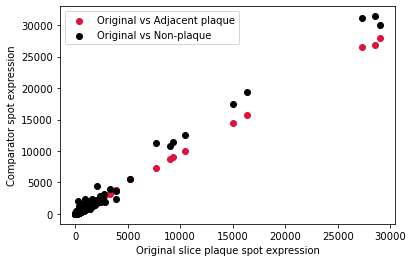

In [174]:
plt.scatter(np.mean(old_m, axis=0),np.mean(new_m, axis=0), c='crimson', label = 'Original vs Adjacent plaque')
plt.scatter(np.mean(old_m, axis=0),np.mean(no_m, axis=0), c='k', label = 'Original vs Non-plaque')
plt.xlabel('Original slice plaque spot expression')
plt.ylabel('Comparator spot expression')
plt.legend()
plt.show()

In [321]:
## Filter by non-overlapping spots
og_filt = og_gene_df.loc[(og_df['plaque'] == 1).values]
new_filt = gene_df.loc[(spot_df['plaque'] == 1).values]
no_filt = gene_df.loc[(spot_df['plaque'] == 0).values]
og_filt

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,...,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,CAAA01118383.1,Vamp7,Spry3,Tmlhe,AC149090.1
AAAGACCCAAGTCGCG-1,0.0,66.577896,0.000000,199.733688,0.000000,0.000000,0.0,66.577896,0.0,66.577896,...,532.623169,8788.282227,1464.713745,133.155792,14580.559570,0.000000,66.577896,66.577896,0.0,266.311584
AACACGACTGTACTGA-1,0.0,74.537865,74.537865,0.000000,0.000000,0.000000,0.0,74.537865,0.0,0.000000,...,447.227173,17814.548828,2012.522339,74.537865,23703.041016,74.537865,0.000000,0.000000,0.0,149.075729
AACCGAGCTTGGTCAT-1,0.0,0.000000,0.000000,0.000000,0.000000,283.559235,0.0,170.135529,0.0,56.711845,...,283.559235,10378.267578,1587.931641,56.711845,16106.164062,0.000000,56.711845,56.711845,0.0,226.847382
AACCGTTGTGTTTGCT-1,0.0,0.000000,81.294205,0.000000,0.000000,162.588409,0.0,0.000000,0.0,0.000000,...,243.882614,7153.890137,975.530457,0.000000,12681.895508,0.000000,0.000000,0.000000,0.0,0.000000
AACTGATATTAGGCCT-1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,192.752502,0.0,64.250832,...,257.003326,13364.172852,1991.775757,0.000000,16319.710938,0.000000,64.250832,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAATCAGTACGTCAG-1,0.0,63.799919,63.799919,63.799919,127.599838,127.599838,0.0,127.599838,0.0,0.000000,...,255.199677,10016.586914,1594.997925,191.399750,15120.581055,0.000000,63.799919,0.000000,0.0,382.799500
TTCATGGCGCAACAGG-1,0.0,104.047455,34.682484,69.364967,0.000000,208.094910,0.0,0.000000,0.0,173.412415,...,485.554779,14115.770508,1907.536621,34.682484,18208.304688,0.000000,0.000000,0.000000,0.0,277.459869
TTCGGTACTGTAGAGG-1,0.0,0.000000,0.000000,0.000000,0.000000,469.836487,0.0,0.000000,0.0,93.967300,...,375.869202,14283.029297,1597.444092,0.000000,16914.113281,0.000000,93.967300,0.000000,0.0,93.967300
TTGGGAAGACGAGCCG-1,0.0,242.522232,242.522232,161.681488,80.840744,161.681488,0.0,161.681488,0.0,80.840744,...,404.203735,18270.007812,2344.381592,161.681488,21665.320312,0.000000,0.000000,0.000000,0.0,242.522232


In [356]:
cort_l

('Cortex Layer 2/3', 'Cortex Layer 4', 'Cortex Layer 5/6a', 'Cortex Layer 6')

In [392]:
#filter plaques and cortex only
cort_i = []
for i in cort_l:
    cort_i = np.append(cort_i, np.where(spot_df['anot']==i))

og_plq = np.intersect1d(np.where(og_df['plaque']==1)[0], cort_i)
new_plq = np.intersect1d(np.where(spot_df['plaque']==1)[0], cort_i)
no_plq = np.intersect1d(np.where(spot_df['plaque']==0)[0], cort_i)

shared = np.intersect1d(og_plq, new_plq)
og_notin = np.setxor1d(og_plq, shared)
new_notin = np.setxor1d(new_plq, shared)


In [393]:
og_v = np.asarray(og_gene_df.iloc[og_notin])
new_v = np.asarray(gene_df.iloc[new_notin])
no_v = np.asarray(gene_df.iloc[no_plq])
no_v.shape, og_v.shape, new_v.shape

((945, 12404), (69, 12404), (71, 12404))

In [394]:
# perform PCA on og_v
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
og_sc = scaler.fit_transform(og_v)
new_sc = scaler.fit_transform(new_v)
no_sc = scaler.fit_transform(no_v)

pca = PCA(n_components=3)
pca.fit(no_sc)
og_pca = pca.transform(og_sc)
new_pca = pca.transform(new_sc)
no_pca = pca.transform(no_sc)

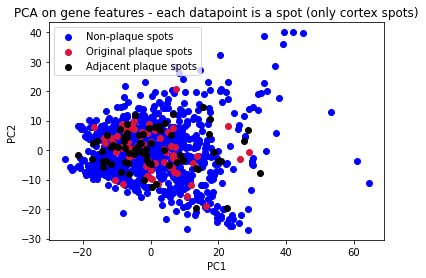

In [562]:
plt.title('PCA on gene features - each datapoint is a spot (only cortex spots)')
plt.scatter(no_pca[:,0], no_pca[:,1], c='b', label = 'Non-plaque spots')
plt.scatter(og_pca[:,0], og_pca[:,1], c='crimson', label = 'Original plaque spots')
plt.scatter(new_pca[:,0], new_pca[:,1], c='k', label = 'Adjacent plaque spots')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig(s_fig + 'plaque-pca.svg', transparent=True)
plt.show()

In [402]:
no_v.shape, og_v.shape, new_v.shape

((945, 12404), (69, 12404), (71, 12404))

In [400]:
# Calculate correlations across plaque spots
plaq_c = np.corrcoef(og_v, new_v)[:new_v.shape[0],new_v.shape[0]:]
plaq_ = np.ravel(plaq_c)
print(plaq_c.shape)

# Calculate correlations plaque - no plaque spots
noplaq_c = np.corrcoef(no_v, new_v)[:new_v.shape[0],new_v.shape[0]:]
noplaq_ = np.ravel(noplaq_c)
print(noplaq_c.shape)

(71, 69)
(71, 945)


In [403]:
np.mean(plaq_), np.mean(noplaq_)

(0.9472961594243551, 0.9411425100557002)

In [564]:
df=pd.DataFrame()
df['correlation'] = np.append(plaq_, noplaq_)
df['plaque'] = np.append(np.full(len(plaq_), 1), np.full(len(noplaq_), 0))
df

,correlation,plaque
0,0.951684,1
1,0.971555,1
2,0.961224,1
3,0.972828,1
4,0.874705,1
...,...,...
71989,0.967256,0
71990,0.959363,0
71991,0.932952,0
71992,0.971607,0


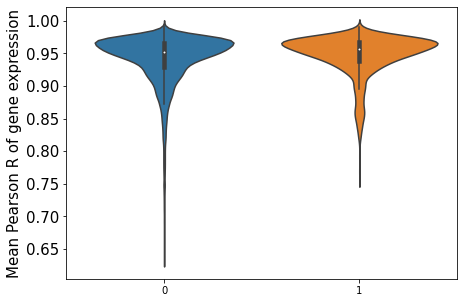

In [570]:
fig,ax = plt.subplots(figsize=(7,5))
sns.violinplot(data=df, x="plaque", y="correlation", jitter=0.2, alpha=0.5)
#
ax.set(xlabel=None)
#plt.xticks([0,1], ['Adjacent plaque - Non-plaque spots', 'Adjacent - Original plaque spots'], fontsize=15)
#plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Mean Pearson R of gene expression', fontsize=15)
plt.savefig(s_fig + 'plaque-correlation.svg', transparent=True)
plt.show()

In [421]:
## COMPARE DE GENES
#filter plaques and cortex only
cort_i = []
for i in cort_l:
    cort_i = np.append(cort_i, np.where(spot_df['anot']==i))

og_plq = np.intersect1d(np.where(og_df['plaque']==1)[0], cort_i)
no_plq_og = np.intersect1d(np.where(og_df['plaque']==0)[0], cort_i)

new_plq = np.intersect1d(np.where(spot_df['plaque']==1)[0], cort_i)
no_plq_new = np.intersect1d(np.where(spot_df['plaque']==0)[0], cort_i)

plq_og_v = np.asarray(og_gene_df.iloc[og_plq])
no_og_v = np.asarray(og_gene_df.iloc[no_plq_og])

plq_new_v = np.asarray(gene_df.iloc[new_plq])
no_new_v = np.asarray(gene_df.iloc[no_plq_new])

plq_og_v.shape, no_og_v.shape, plq_new_v.shape, no_new_v.shape

((90, 12404), (947, 12404), (92, 12404), (945, 12404))

In [425]:
name_i = gene_df.columns.values
name_i.shape

(12404,)

In [594]:
# Find DE genes in original section
data1,data2=plq_og_v, no_og_v

import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(data1[:,i], data2[:,i], alternative='two-sided') for i in range(data1.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# # sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
sig_genes = name_i[sig_v]


In [603]:
np.intersect1d(sig_genes, new_sig_genes)

array(['B2m', 'C1qa', 'C4b', 'Ctsd', 'Ctss', 'Gfap', 'H2-Aa', 'H2-D1',
       'Ifi27l2a', 'Lgals3bp', 'Ly6h', 'Ncdn', 'Serpina3n', 'Tyrobp'],
      dtype=object)

In [601]:
np.sort(sig_genes)

array(['Atp2b4', 'B2m', 'C1qa', 'C4b', 'Cabp7', 'Ccl12', 'Cox6a1', 'Ctsd',
       'Ctss', 'Flt3l', 'Fth1', 'Gfap', 'H2-Aa', 'H2-D1', 'H2-K1',
       'Hist1h1c', 'Ifi27l2a', 'Lair1', 'Lgals3bp', 'Ly6e', 'Ly6h',
       'Mapk1', 'Meg3', 'Mfge8', 'Mmp17', 'Ncdn', 'Nmnat2', 'Pcp4',
       'Prss23', 'Rapgef4', 'Serpina3n', 'Spred2', 'Thra', 'Trbc2',
       'Tspan7', 'Tyrobp'], dtype=object)

In [602]:
np.sort(new_sig_genes)

array(['Anxa3', 'Asb2', 'B2m', 'Bst2', 'C1qa', 'C1qb', 'C1qc', 'C4b',
       'Ccl5', 'Cd44', 'Cd52', 'Cd68', 'Cd74', 'Cd84', 'Cela1', 'Chl1',
       'Cmtm6', 'Coa5', 'Csf3r', 'Cst7', 'Ctsb', 'Ctsd', 'Ctsl', 'Ctss',
       'Cxcl16', 'Dhrs1', 'Efna5', 'Fcer1g', 'Fcrls', 'Ftl1', 'Fxyd1',
       'Gfap', 'Gpcpd1', 'Gpr34', 'H2-Aa', 'H2-Ab1', 'H2-D1', 'Hexb',
       'Ifi27', 'Ifi27l2a', 'Ifit3', 'Ifitm3', 'Irgm1', 'Isg15', 'Klk6',
       'Lgals3bp', 'Ly6h', 'Ly86', 'Lyz2', 'Mpeg1', 'Ncdn', 'Ncf2',
       'Nek6', 'Olfml3', 'Pole3', 'Ppip5k2', 'Ptpn6', 'Pycard', 'S100a6',
       'Serpina3n', 'Sparc', 'Tagln2', 'Tnfaip8l2', 'Trem2', 'Tyrobp',
       'Vim', 'Zfp809'], dtype=object)

In [596]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])
value1 = np.asarray([np.mean(data1[:,i]) for i in range(data1.shape[1])])
value2 = np.asarray([np.mean(data2[:,i]) for i in range(data2.shape[1])])
df = {'GeneNames': np.array(name_i), 'plaque': value1, 'no plaque':value2, 'log2FC': lgf2, 'p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]
df


<ipython-input-596-cf7c8e993681>:2: RuntimeWarning: divide by zero encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])


,GeneNames,plaque,no plaque,log2FC,p-value
0,Sox17,9.626844,4.985401,0.949354,0.621706
1,Mrpl15,40.853493,51.272083,-0.327714,0.756761
2,Lypla1,34.528564,39.779110,-0.204221,0.766850
3,Tcea1,74.593124,74.728897,-0.002624,0.903044
4,Rgs20,36.618835,34.037273,0.105470,0.942611
...,...,...,...,...,...
12399,CAAA01118383.1,8.049618,8.058754,-0.001636,0.906167
12400,Vamp7,43.984745,37.730717,0.221264,0.808954
12401,Spry3,6.129004,7.231562,-0.238655,0.919539
12402,Tmlhe,4.115935,3.195363,0.365240,0.863636


In [538]:
top_n

['H2-D1',
 'B2m',
 'Gfap',
 'Lgals3bp',
 'Ly6e',
 'Ifi27l2a',
 'Ifi27l2a',
 'Ctss',
 'Pcp4',
 'Cox6a1']

In [597]:
#from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=df, dim = (10,8), color = ('red', 'grey', 'green') , lfc='log2FC', pv='p-value', 
                            gstyle=1, geneid = 'GeneNames', lfc_thr=(0.5,0.5), valpha = 0.8, 
                            genenames = tuple(top_n), sign_line=True
                             ,plotlegend=True, legendpos='upper left',
                             axtickfontsize = 25, axtickfontname='sans',axlabelfontsize=25, dotsize = 25, gfont=15, figtype='png')
    
                            

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [598]:
# Find DE genes in original section
data1,data2=plq_new_v, no_new_v

import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(data1[:,i], data2[:,i], alternative='two-sided') for i in range(data1.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# # sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
new_sig_genes = name_i[sig_v]


In [591]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])
value1 = np.asarray([np.mean(data1[:,i]) for i in range(data1.shape[1])])
value2 = np.asarray([np.mean(data2[:,i]) for i in range(data2.shape[1])])
df = {'GeneNames': np.array(name_i), 'plaque': value1, 'no plaque':value2, 'log2FC': lgf2, 'p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]
df


<ipython-input-591-cf7c8e993681>:2: RuntimeWarning: divide by zero encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(data1[:,i])/np.mean(data2[:,i])) for i in range(data1.shape[1])])


,GeneNames,plaque,no plaque,log2FC,p-value
0,Sox17,4.711431,5.454115,-0.211180,0.983591
1,Mrpl15,51.871559,50.221474,0.046639,0.995621
2,Lypla1,46.373020,38.637112,0.263298,0.907690
3,Tcea1,62.580536,75.898659,-0.278360,0.700067
4,Rgs20,38.617672,33.837215,0.190650,0.948626
...,...,...,...,...,...
12399,CAAA01118383.1,6.352973,8.223949,-0.372400,0.919022
12400,Vamp7,37.901993,38.309662,-0.015435,0.985376
12401,Spry3,5.804730,7.265466,-0.323826,0.904473
12402,Tmlhe,2.097820,3.389888,-0.692347,0.912611


In [593]:
#from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=df, dim = (10,8), color = ('red', 'grey', 'green') , lfc='log2FC', pv='p-value', 
                            gstyle=1, geneid = 'GeneNames', lfc_thr=(0.5,0.5), valpha = 0.8, 
                            genenames = tuple(top_n), sign_line=True
                             ,plotlegend=True, legendpos='upper left',
                             axtickfontsize = 25, axtickfontname='sans',axlabelfontsize=25, dotsize = 25, gfont=15, figtype='png')
    
                            

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [547]:
np.sort(np.intersect1d(new_sig_genes, sig_genes))

array(['B2m', 'C1qa', 'C4b', 'Ctsd', 'Ctss', 'Gfap', 'H2-Aa', 'H2-D1',
       'Ifi27l2a', 'Lgals3bp', 'Ly6h', 'Ncdn', 'Serpina3n', 'Tyrobp'],
      dtype=object)

# Correlate APP expression with plaque levels

In [15]:
np.append(gene_all, gene_df['humanAPP'].values)

array([594.2948 , 953.113  , 198.62947, ..., 135.54422, 216.73952,
       229.06883], dtype=float32)

In [16]:
#group data together
name_l = '030-B', '030-C', '040-A', '040-C', '040-D'

for name in name_l:
    spot_df, gene_df = run_(name)
    if name == name_l[0]: 
        gene_all = gene_df['humanAPP'].values
        lab = spot_df['plaque']
        name_all = np.repeat(name, len(gene_df['humanAPP'].values))
    else: 
        gene_all = np.append(gene_all, gene_df['humanAPP'].values)
        lab = np.hstack((lab, spot_df['plaque']))
        name_all = np.hstack((name_all, np.repeat(name, len(gene_df['humanAPP'].values))))

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 2939
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3532
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3465
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3616
Number of genes: 32285


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3457
Number of genes: 32285


In [68]:
df = pd.DataFrame({'human APP CPMs': gene_all, 'plaque': lab, 'sample': name_all})
df

,human APP CPMs,plaque,sample
0,594.294800,0,030-B
1,953.112976,0,030-B
2,198.629471,0,030-B
3,285.861298,0,030-B
4,195.121948,0,030-B
...,...,...,...
17004,366.193054,0,040-D
17005,429.397186,0,040-D
17006,365.020599,0,040-D
17007,730.239502,0,040-D


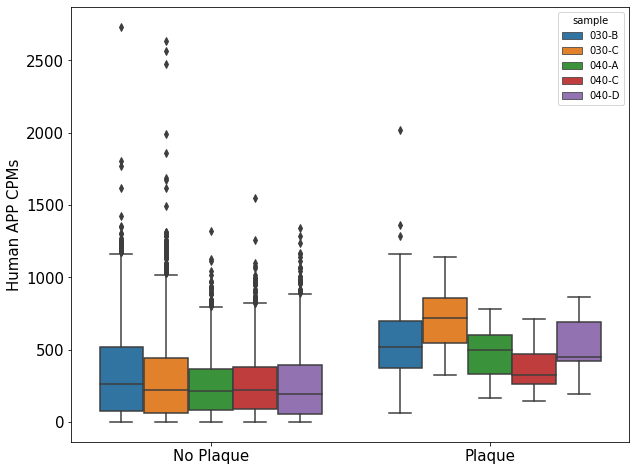

In [78]:
import seaborn as sns
# Correlate human APP expression with plaque load -- treat each spot independently
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample')
#set label names and size
ax.set_ylabel('Human APP CPMs', fontsize=15)
#remove x label
ax.set_xlabel('')
#change x tick names
ax.set_xticklabels(['No Plaque', 'Plaque'], fontsize=15)
#increase y tick size
ax.tick_params(axis='y', labelsize=15)
plt.show()

In [86]:
i=0
df['human APP CPMs'].iloc[np.where((df['plaque'] == 0) & (df['sample'] == name_l[i]))[0]].values

array([594.2948 , 953.113  , 198.62947, ..., 937.20715, 201.57227,
         0.     ], dtype=float32)

In [89]:
# significant test
from scipy.stats import mannwhitneyu
# Wilcoxon signed rank test
for i in range(len(name_l)):
    print(mannwhitneyu(df['human APP CPMs'].iloc[np.where((df['plaque'] == 0) & (df['sample'] == name_l[i]))[0]].values, df['human APP CPMs'].iloc[np.where((df['plaque'] == 1) & (df['sample'] == name_l[i]))[0]].values, alternative='two-sided'))

MannwhitneyuResult(statistic=77535.0, pvalue=1.1736246740466518e-15)
MannwhitneyuResult(statistic=4786.0, pvalue=1.4367573145619633e-05)
MannwhitneyuResult(statistic=8506.0, pvalue=0.0004035117312429103)
MannwhitneyuResult(statistic=41053.0, pvalue=6.613302926617175e-05)
MannwhitneyuResult(statistic=9409.0, pvalue=4.89089698665726e-06)


In [105]:
from scipy.stats import pointbiserialr

pointbiserialr(df['plaque'], df['human APP CPMs'])

SignificanceResult(statistic=0.1044420687279617, pvalue=1.8201273802524843e-42)

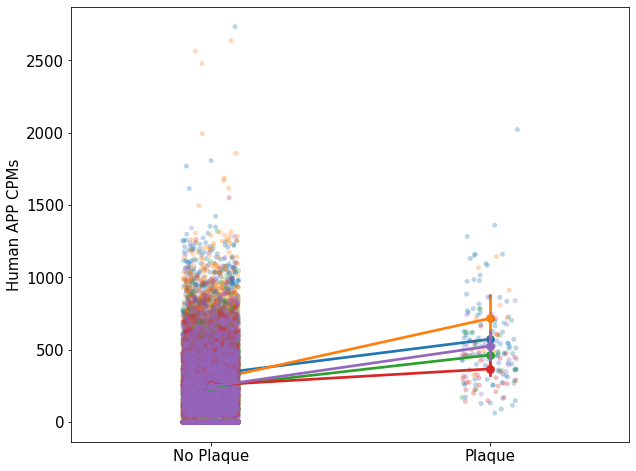

In [102]:
import seaborn as sns
# Correlate human APP expression with plaque load -- treat each spot independently
fig,ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample', alpha=0.3)
sns.pointplot(data=df, x = 'plaque', y ='human APP CPMs', hue = 'sample', label=None)#, ci=None, color='grey')

#set label names and size
ax.set_ylabel('Human APP CPMs', fontsize=15)
#remove x label
ax.set_xlabel('')
#change x tick names
ax.set_xticklabels(['No Plaque', 'Plaque'], fontsize=15)
#increase y tick size
ax.tick_params(axis='y', labelsize=15)
#remove legend
ax.legend_.remove()
plt.show()

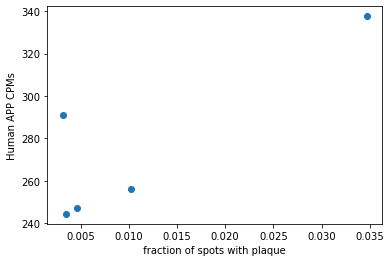

In [52]:
plt.scatter(plq_pc, curr_exp)
#set x and y axis labels
plt.xlabel(' fraction of spots with plaque ')
plt.ylabel('Human APP CPMs')
plt.show()

In [40]:
curr_exp, sum_plq

(247.18889, 16)

In [ ]:
# Correlate human APP expression with plaque load -- mean for each sample


# Plaque differential expression


In [5]:
#sort out names
import glob
import os
os.chdir('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/coords/')
og = glob.glob('*.json')
ID = [i.split('.')[0] for i in og]
sub_ID=[]
for x,i in enumerate(og):
    if x != 6: sub_ID = np.append(sub_ID, i.split('_')[1][:-5])
    else: sub_ID = np.append(sub_ID, i[:-5])
ID, sub_ID


(['V10S15_040-D',
  'V11Y17_109-C',
  'S29_030-D',
  'V10S15_040-A',
  'V11Y17_109-A',
  'V10S15_040-C',
  '030-B',
  'V11Y10_030-C',
  'V11Y17_109-D'],
 array(['040-D', '109-C', '030-D', '040-A', '109-A', '040-C', '030-B',
        '030-C', '109-D'], dtype='<U32'))

In [6]:
#Load in metadata
meta = pd.read_csv('/cndd2/agelber/hal/metadata.csv')
meta

,sample,age,sex,genotype,time,sample_number,sample_name,resequenced
0,039-A_S18,7 months,F,WT,ZT0,S18,039-A,False
1,039-B_S19,7 months,F,WT,ZT6,S19,039-B,True
2,039-C_S20,7 months,F,WT,ZT12,S20,039-C,True
3,039-D_S21,7 months,F,WT,ZT18,S21,039-D,False
4,042-A_S22,7 months,M,WT,ZT6,S22,042-A,False
...,...,...,...,...,...,...,...,...
61,351-D_S12,14 months,F,WT,ZT18,S12,351-D,False
62,043-A_S12,14 months,F,APP23,ZT0,S12,043-A,True
63,043-B_S13,14 months,M,APP23,ZT6,S13,043-B,True
64,043-C_S14,14 months,F,WT,ZT12,S14,043-C,True


In [14]:
spot_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,sample,sex,adj
127806,AAACAAGTATCTCCCA-1,1,50,102,414,1725,0,Amygdala,040-D,F,0.0
127807,AAACAATCTACTAGCA-1,1,3,43,1041,863,0,Meninges,040-D,F,0.0
127808,AAACAGAGCGACTCCT-1,1,14,94,501,1063,0,GP/TH,040-D,F,0.0
127809,AAACAGTGTTCCTGGG-1,1,73,43,1036,2151,0,Cortex Layer 5a,040-D,F,0.0
127810,AAACATTTCCCGGATT-1,1,61,97,466,1928,0,Amygdala,040-D,F,0.0
...,...,...,...,...,...,...,...,...,...,...,...
131086,TTGTTTCACATCCAGG-1,1,58,42,1048,1875,0,Cortex Layer 6a,040-D,F,0.0
131087,TTGTTTCATTAGTCTA-1,1,60,30,1175,1912,0,Cortex Layer 5a,040-D,F,0.0
131088,TTGTTTCCATACAACT-1,1,45,27,1207,1636,0,Cortex Layer 2/3,040-D,F,0.0
131089,TTGTTTGTATTACACG-1,1,73,41,1057,2151,0,Cortex Layer 5a,040-D,F,0.0


In [17]:
#read csv
prac_df = pd.read_csv('/cndd2/agelber/hal/qc_aligned/040-D/outs/spatial/tissue_positions.csv')

In [18]:
prac_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,ACGCCTGACACGCGCT-1,0,0,0,1496,809
1,TACCGATCCAACACTT-1,0,1,1,1485,828
2,ATTAAAGCGGACGAGC-1,0,0,2,1475,809
3,GATAAGGGACGATTAG-1,0,1,3,1464,828
4,GTGCAAATCACCAATA-1,0,0,4,1454,809
...,...,...,...,...,...,...
4987,GAACGTTTGTATCCAC-1,0,77,123,190,2221
4988,ATTGAATTCCCTGTAG-1,0,76,124,180,2203
4989,TACCTCACCAATTGTA-1,0,77,125,169,2221
4990,AGTCGAATTAGCGTAA-1,0,76,126,158,2203


In [ ]:
def adj(spot_df):
    plq_bool = spot_df['plaque'].values == 1
    all_coords = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values

    #find the n nearest neighbours
    from sklearn.neighbors import NearestNeighbors
    X = np.asarray(all_coords).T
    nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    adj_ind = np.unique(np.ravel(indices[plq_bool][:,1:])) #indeces nn of plq spots
    final_adjind = np.intersect1d(adj_ind,np.setxor1d(adj_ind, indices[plq_bool][:,0])) #check that adj spots that are not plaques
    return(final_adjind)


In [12]:
#group data together for DESEQ
# Plaque vs no plaque
name_l = ID
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    spot_df, gene_df = run_(ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex
    spot_df['adj'] = np.zeros(len(spot_df))
    adj_ind = adj(spot_df)
    spot_df['adj'].iloc[adj_ind] = 1

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'adj', 'cluster', 'array_row', 'array_col']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
lab['adj'] = lab['adj'].values.astype(int)   

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3285
Number of genes: 32284


NameError: name 'adj' is not defined

# Plaque neighbourhood

In [6]:
def adj(spot_df):
    plq_bool = spot_df['plaque'].values == 1
    all_coords = spot_df['pxl_row_in_fullres'].values, spot_df['pxl_col_in_fullres'].values

    #find the n nearest neighbours
    from sklearn.neighbors import NearestNeighbors
    X = np.asarray(all_coords).T
    nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    adj_ind = np.unique(np.ravel(indices[plq_bool][:,1:])) #indeces nn of plq spots
    final_adjind = np.intersect1d(adj_ind,np.setxor1d(adj_ind, indices[plq_bool][:,0])) #check that adj spots that are not plaques
    return(final_adjind)


In [13]:
spot_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,sample,sex,adj
127806,AAACAAGTATCTCCCA-1,1,50,102,414,1725,0,Amygdala,040-D,F,0.0
127807,AAACAATCTACTAGCA-1,1,3,43,1041,863,0,Meninges,040-D,F,0.0
127808,AAACAGAGCGACTCCT-1,1,14,94,501,1063,0,GP/TH,040-D,F,0.0
127809,AAACAGTGTTCCTGGG-1,1,73,43,1036,2151,0,Cortex Layer 5a,040-D,F,0.0
127810,AAACATTTCCCGGATT-1,1,61,97,466,1928,0,Amygdala,040-D,F,0.0
...,...,...,...,...,...,...,...,...,...,...,...
131086,TTGTTTCACATCCAGG-1,1,58,42,1048,1875,0,Cortex Layer 6a,040-D,F,0.0
131087,TTGTTTCATTAGTCTA-1,1,60,30,1175,1912,0,Cortex Layer 5a,040-D,F,0.0
131088,TTGTTTCCATACAACT-1,1,45,27,1207,1636,0,Cortex Layer 2/3,040-D,F,0.0
131089,TTGTTTGTATTACACG-1,1,73,41,1057,2151,0,Cortex Layer 5a,040-D,F,0.0


In [ ]:
#group data together for DESEQ
# Plaque vs no plaque
name_l = ID
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]

for x,name in enumerate(name_l):
    spot_df, gene_df = run_(ID[x], sub_ID[x])
    sample = np.full(len(spot_df), sub_ID[x])
    sex = np.full(len(spot_df), sex_l[x])
    spot_df['sample'] = sample
    spot_df['sex'] = sex
    spot_df['adj'] = np.zeros(len(spot_df))
    adj_ind = adj(spot_df)
    spot_df['adj'].iloc[adj_ind] = 1

    new_df = spot_df[['barcode', 'sample', 'sex', 'plaque', 'adj', 'cluster', 'array_row', 'array_col']]
    new_df['barcode'] = new_df['barcode'].astype(str)+'_'+new_df['sample'].astype(str)
    gene_df.index = gene_df.index.astype(str)+'_'+new_df['sample'].astype(str)
    drop = np.append(drop, gene_df.T[np.sum(gene_df, axis=0) < 10].index.values)
    if name == name_l[0]: 
        gene_all = gene_df
        lab = new_df
    else: 
        gene_all = pd.concat([gene_all, gene_df], axis=0)
        lab = pd.concat([lab, new_df], axis=0)

gene_all = gene_all.T #genes x rows needed for DESEQ
gene_all.drop(np.unique(drop), axis=0, inplace=True)
lab = lab.set_index('barcode')
lab['adj'] = lab['adj'].values.astype(int)   

In [92]:
spot_df

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres,plaque,cluster,sample,sex,adj
127806,AAACAAGTATCTCCCA-1,1,50,102,414,1725,0,Amygdala,040-D,F,0.0
127807,AAACAATCTACTAGCA-1,1,3,43,1041,863,0,Meninges,040-D,F,0.0
127808,AAACAGAGCGACTCCT-1,1,14,94,501,1063,0,GP/TH,040-D,F,0.0
127809,AAACAGTGTTCCTGGG-1,1,73,43,1036,2151,0,Cortex Layer 5a,040-D,F,0.0
127810,AAACATTTCCCGGATT-1,1,61,97,466,1928,0,Amygdala,040-D,F,0.0
...,...,...,...,...,...,...,...,...,...,...,...
131086,TTGTTTCACATCCAGG-1,1,58,42,1048,1875,0,Cortex Layer 6a,040-D,F,0.0
131087,TTGTTTCATTAGTCTA-1,1,60,30,1175,1912,0,Cortex Layer 5a,040-D,F,0.0
131088,TTGTTTCCATACAACT-1,1,45,27,1207,1636,0,Cortex Layer 2/3,040-D,F,1.0
131089,TTGTTTGTATTACACG-1,1,73,41,1057,2151,0,Cortex Layer 5a,040-D,F,0.0


In [94]:
gene_all

,AAACAAGTATCTCCCA-1_109-D,AAACAGAGCGACTCCT-1_109-D,AAACAGCTTTCAGAAG-1_109-D,AAACATTTCCCGGATT-1_109-D,AAACCCGAACGAAATC-1_109-D,AAACCGTTCGTCCAGG-1_109-D,AAACCTAAGCAGCCGG-1_109-D,AAACGAAGAACATACC-1_109-D,AAACGAGACGGTTGAT-1_109-D,AAACGCCCGAGATCGG-1_109-D,...,TTGTGTATGCCACCAA-1_040-D,TTGTGTTTCCCGAAAG-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTCAGTGTGCTAC-1_040-D,TTGTTGTGTGTCAAGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
Lypla1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,2.0,3.0,2.0,0.0
Spry3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmlhe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAAA01147332.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
lab

,sample,sex,plaque,adj,cluster,pxl_row_in_fullres,pxl_col_in_fullres
barcode,,,,,,,
AAACAAGTATCTCCCA-1_109-D,109-D,M,0,1,Cortex Layer 4,403,1523
AAACAGAGCGACTCCT-1_109-D,109-D,M,0,0,Fiber Tracts,492,846
AAACAGCTTTCAGAAG-1_109-D,109-D,M,0,0,Piriform Cortex,1410,1395
AAACATTTCCCGGATT-1_109-D,109-D,M,0,1,Cortex Layer 2/3,456,1731
AAACCCGAACGAAATC-1_109-D,109-D,M,0,0,Cortex Layer 2/3,263,1429
...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1_040-D,040-D,F,0,0,Cortex Layer 6a,1048,1875
TTGTTTCATTAGTCTA-1_040-D,040-D,F,0,0,Cortex Layer 5a,1175,1912
TTGTTTCCATACAACT-1_040-D,040-D,F,0,1,Cortex Layer 2/3,1207,1636


In [8]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind].T
cort_gene


,AAACAAGTATCTCCCA-1_109-D,AAACATTTCCCGGATT-1_109-D,AAACCCGAACGAAATC-1_109-D,AAACCTAAGCAGCCGG-1_109-D,AAACGCCCGAGATCGG-1_109-D,AAACGGGCGTACGGGT-1_109-D,AAACGGTTGCGAACTG-1_109-D,AAACTAACGTGGCGAC-1_109-D,AAACTCGGTTCGCAAT-1_109-D,AAACTCGTGATATAAG-1_109-D,...,TTGGGAAGACGAGCCG-1_040-D,TTGTAAGGACCTAAGT-1_040-D,TTGTCTCGGCAAGATG-1_040-D,TTGTGGTAGGAGGGAT-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0
Lypla1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0
Spry3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmlhe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAAA01147332.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
_gene=pd.DataFrame()
_counts =[]

for s in sub_ID:
    sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
    sumd = pd.DataFrame(sumd, columns=[s])
    _gene = pd.concat([_gene, sumd], axis=1)
    _counts = np.append(_counts, sum(cort_lab[cort_lab['sample'] == s]['plaque'].values))


<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
<ipython-input-156-cfb0189b9400>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s]

In [161]:
_gene.values.shape

(14074, 9)

In [ ]:
gene_norm = (_gene.values/np.sum(_gene.values,axis=0))*1000000

In [75]:
sub_ = cort_gene[adj_p_vals<0.2]
sub_.index

Index(['Arid5a', 'Neu4', 'Prdx6', 'Fcer1g', 'Nfe2l2', 'Prr5l', 'Decr1',
       'Glipr2', 'Cd52', 'Mmd2', 'Hpgds', 'Capg', 'Cd9', 'Cacng8', 'Lgi4',
       'Siglech', 'Cyba', 'Cmtm6', 'Tgfbr2', 'Ccl9', 'Ccl6', 'Slc16a3', 'Ly86',
       'Gm5086', 'Tspan14', 'Pros1', 'H2-DMb1', 'Slc14a1', 'Kcne1l'],
      dtype='object')

In [269]:
_gene

,109-D,030-C,030-D,109-A,040-C,030-B,109-C,040-A,040-D
Xkr4,7.0,29.0,38.0,9.0,29.0,16.0,7.0,22.0,14.0
Gm19938,6.0,19.0,38.0,6.0,11.0,11.0,3.0,65.0,44.0
Sox17,43.0,112.0,135.0,25.0,109.0,73.0,24.0,110.0,84.0
Mrpl15,424.0,936.0,1301.0,427.0,1271.0,670.0,228.0,1303.0,1120.0
Lypla1,241.0,823.0,999.0,284.0,1088.0,538.0,168.0,1057.0,972.0
...,...,...,...,...,...,...,...,...,...
Vamp7,247.0,678.0,942.0,274.0,974.0,520.0,155.0,928.0,820.0
Spry3,59.0,169.0,324.0,39.0,208.0,101.0,25.0,232.0,216.0
Tmlhe,5.0,46.0,86.0,17.0,43.0,46.0,4.0,37.0,56.0
CAAA01147332.1,12.0,11.0,25.0,15.0,26.0,11.0,9.0,31.0,22.0


In [273]:
_gene.values.shape

(14074, 9)

In [21]:
_gene.values

array([[7.000e+00, 2.900e+01, 3.800e+01, ..., 7.000e+00, 2.200e+01,
        1.400e+01],
       [6.000e+00, 1.900e+01, 3.800e+01, ..., 3.000e+00, 6.500e+01,
        4.400e+01],
       [4.300e+01, 1.120e+02, 1.350e+02, ..., 2.400e+01, 1.100e+02,
        8.400e+01],
       ...,
       [5.000e+00, 4.600e+01, 8.600e+01, ..., 4.000e+00, 3.700e+01,
        5.600e+01],
       [1.200e+01, 1.100e+01, 2.500e+01, ..., 9.000e+00, 3.100e+01,
        2.200e+01],
       [1.428e+03, 5.797e+03, 6.977e+03, ..., 7.850e+02, 6.562e+03,
        4.901e+03]], dtype=float32)

In [22]:
np.sum(_gene.values,axis=0)

array([ 6646972., 20543434., 27102592.,  6844248., 27205314., 13164344.,
        3819219., 26623704., 22158276.], dtype=float32)

In [23]:
gene_norm = (_gene.values/np.sum(_gene.values,axis=0))*1000000

In [276]:
np.corrcoef(_counts, _gene.values)

array([[1.        , 0.43789771, 0.02966991, ..., 0.63385945, 0.068472  ,
        0.39003706],
       [0.43789771, 1.        , 0.41491322, ..., 0.83257884, 0.54613683,
        0.84597469],
       [0.02966991, 0.41491322, 1.        , ..., 0.54731826, 0.77892218,
        0.78638706],
       ...,
       [0.63385945, 0.83257884, 0.54731826, ..., 1.        , 0.52681503,
        0.86511509],
       [0.068472  , 0.54613683, 0.77892218, ..., 0.52681503, 1.        ,
        0.66183752],
       [0.39003706, 0.84597469, 0.78638706, ..., 0.86511509, 0.66183752,
        1.        ]])

In [51]:
sub_gn = gene_norm[adj_p_vals < 0.2]

In [52]:
sub_gn.shape

(29, 9)

In [65]:
adm.sort_2list(_counts, sub_gn[0])


([1.0, 6.0, 14.0, 24.0, 34.0, 41.0, 42.0, 80.0, 89.0],
 [3.142003606626531,
  2.629945583976223,
  3.4180068269051844,
  3.310060037620133,
  3.294480166005087,
  3.455207206570776,
  3.7611109746649163,
  4.3538270801946055,
  4.709691438620212])

In [73]:
curr[0]

[1.0, 6.0, 14.0, 24.0, 34.0, 41.0, 42.0, 80.0, 89.0]

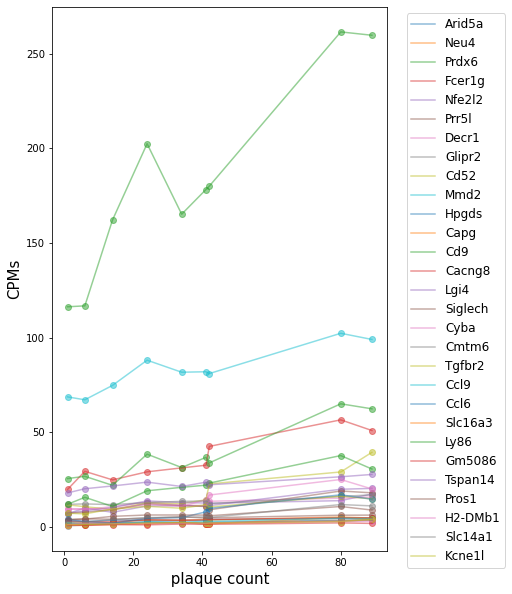

In [88]:
fig,ax = plt.subplots(figsize=(6,10))
for i in range(sub_gn.shape[0]):
    curr = adm.sort_2list(_counts, sub_gn[i])
    plt.plot(curr[0], curr[1], alpha=0.5, label = sub_.index[i]) 
    plt.scatter(_counts, sub_gn[i], alpha=0.5)
#set x and y axis labels
plt.xlabel(' plaque count ', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.legend(fontsize=12,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig(s_fig + '/plaquenum_CPMs.svg', transparent=True)
plt.show()

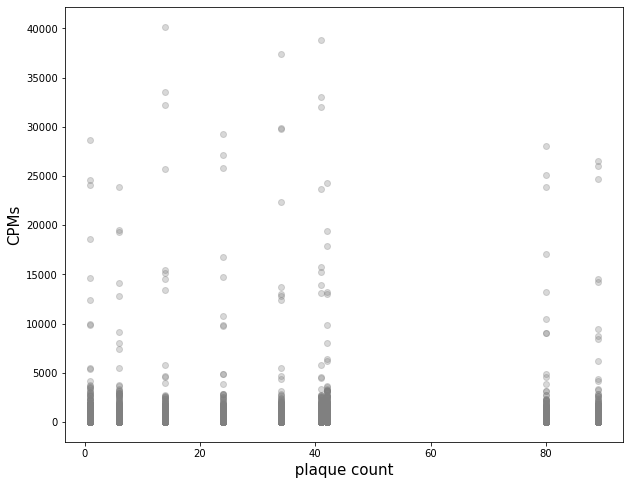

In [37]:
fig,ax = plt.subplots(figsize=(10,8))
for i in range(len(_gene.values)):
    plt.scatter(_counts, gene_norm[i], c='grey', alpha=0.3)
#set x and y axis labels
plt.xlabel(' plaque count ', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.savefig(s_fig + '/plaquenum_CPMs.png', transparent=True)
plt.show()

In [ ]:
# Find nearest plaque for each spot, and gene expression
# sort by distance
# put into bins based on distance to nearest plaque
# Look for spatial genes




In [97]:
cort_gene

,AAACAAGTATCTCCCA-1_109-D,AAACATTTCCCGGATT-1_109-D,AAACCCGAACGAAATC-1_109-D,AAACCTAAGCAGCCGG-1_109-D,AAACGCCCGAGATCGG-1_109-D,AAACGGGCGTACGGGT-1_109-D,AAACGGTTGCGAACTG-1_109-D,AAACTAACGTGGCGAC-1_109-D,AAACTCGGTTCGCAAT-1_109-D,AAACTCGTGATATAAG-1_109-D,...,TTGGGAAGACGAGCCG-1_040-D,TTGTAAGGACCTAAGT-1_040-D,TTGTCTCGGCAAGATG-1_040-D,TTGTGGTAGGAGGGAT-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0
Lypla1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0
Spry3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmlhe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAAA01147332.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind].T
cort_gene


,AAACAAGTATCTCCCA-1_109-D,AAACATTTCCCGGATT-1_109-D,AAACCCGAACGAAATC-1_109-D,AAACCTAAGCAGCCGG-1_109-D,AAACGCCCGAGATCGG-1_109-D,AAACGGGCGTACGGGT-1_109-D,AAACGGTTGCGAACTG-1_109-D,AAACTAACGTGGCGAC-1_109-D,AAACTCGGTTCGCAAT-1_109-D,AAACTCGTGATATAAG-1_109-D,...,TTGGGAAGACGAGCCG-1_040-D,TTGTAAGGACCTAAGT-1_040-D,TTGTCTCGGCAAGATG-1_040-D,TTGTGGTAGGAGGGAT-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0
Lypla1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0
Spry3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tmlhe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAAA01147332.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
plq_pos = cort_lab[cort_lab['plaque']==1]['array_row'].values,cort_lab[cort_lab['plaque']==1]['array_col'].values


In [11]:
#Loop through each spot and find the nearest plaque
dist_v = []
for c in range(len(cort_lab)):
    spot = cort_lab.iloc[c]['array_row'], cort_lab.iloc[c]['array_col']
    dist = np.sqrt(((spot[0]-plq_pos[0])**2 + (spot[1]-plq_pos[1])**2).astype(float))
    dist_v = np.append(dist_v,np.min(dist))

cort_lab['dist'] = dist_v*100

<ipython-input-11-c503dd2313b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cort_lab['dist'] = dist_v*100


In [12]:
cort_lab

,sample,sex,plaque,adj,cluster,array_row,array_col,dist
barcode,,,,,,,,
AAACAAGTATCTCCCA-1_109-D,109-D,M,0,1,Cortex Layer 4,50,102,141.421356
AAACATTTCCCGGATT-1_109-D,109-D,M,0,1,Cortex Layer 2/3,61,97,200.000000
AAACCCGAACGAAATC-1_109-D,109-D,M,0,0,Cortex Layer 2/3,45,115,141.421356
AAACCTAAGCAGCCGG-1_109-D,109-D,M,0,0,Cortex Layer 5a,65,83,141.421356
AAACGCCCGAGATCGG-1_109-D,109-D,M,0,0,Cortex Layer 2/3,4,108,141.421356
...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1_040-D,040-D,F,0,0,Cortex Layer 6a,58,42,141.421356
TTGTTTCATTAGTCTA-1_040-D,040-D,F,0,0,Cortex Layer 5a,60,30,141.421356
TTGTTTCCATACAACT-1_040-D,040-D,F,0,1,Cortex Layer 2/3,45,27,141.421356


In [13]:
_gene=pd.DataFrame()
_counts =[]

for s in sub_ID:
    sumd =  np.sum(cort_gene.T[cort_lab['sample'] == s])
    sumd = pd.DataFrame(sumd, columns=[s])
    _gene = pd.concat([_gene, sumd], axis=1)
np.sum(_gene.values,axis=0)

array([ 6646972., 20543434., 27102592.,  6844248., 27205314., 13164344.,
        3819219., 26623704., 22158276.], dtype=float32)

In [194]:
cort_gene.T[cort_lab['sample'] == s].T/np.sum(_gene.values,axis=0)[0]

,AAACAGTGTTCCTGGG-1_040-D,AAACCGGGTAGGTACC-1_040-D,AAACCGTTCGTCCAGG-1_040-D,AAACGGTTGCGAACTG-1_040-D,AAAGACCCAAGTCGCG-1_040-D,AAAGTAGCATTGCTCA-1_040-D,AAAGTCACTGATGTAA-1_040-D,AAATGTGGGTGCTCCT-1_040-D,AAATTGATAGTCCTTT-1_040-D,AAATTTGCGGGTGTGG-1_040-D,...,TTGGGAAGACGAGCCG-1_040-D,TTGTAAGGACCTAAGT-1_040-D,TTGTCTCGGCAAGATG-1_040-D,TTGTGGTAGGAGGGAT-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Gm19938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Sox17,0.000000e+00,0.000000e+00,0.000000e+00,3.008889e-07,1.504444e-07,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Mrpl15,9.026667e-07,0.000000e+00,1.504444e-07,3.008889e-07,1.504444e-07,1.504444e-07,0.000000e+00,1.504444e-07,1.504444e-07,7.522222e-07,...,6.017778e-07,0.000000e+00,0.000000e+00,1.504444e-07,6.017778e-07,0.000000e+00,3.008889e-07,0.000000e+00,1.504444e-07,0.000000e+00
Lypla1,6.017778e-07,1.504444e-07,4.513333e-07,1.504444e-07,3.008889e-07,0.000000e+00,1.504444e-07,1.504444e-07,3.008889e-07,3.008889e-07,...,0.000000e+00,0.000000e+00,3.008889e-07,6.017778e-07,0.000000e+00,3.008889e-07,1.504444e-07,0.000000e+00,3.008889e-07,1.504444e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,1.504444e-07,0.000000e+00,0.000000e+00,1.504444e-07,7.522222e-07,0.000000e+00,1.504444e-07,3.008889e-07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,3.008889e-07,4.513333e-07,3.008889e-07,0.000000e+00
Spry3,1.504444e-07,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.008889e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tmlhe,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CAAA01147332.1,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [14]:
norm_gene = pd.DataFrame()
for x,s in enumerate(sub_ID):
    gol = cort_gene.T[cort_lab['sample'] == s].T/np.sum(_gene.values,axis=0)[x]
    norm_gene = pd.concat([norm_gene, gol], axis=1)

In [15]:
norm_gene

,AAACAAGTATCTCCCA-1_109-D,AAACATTTCCCGGATT-1_109-D,AAACCCGAACGAAATC-1_109-D,AAACCTAAGCAGCCGG-1_109-D,AAACGCCCGAGATCGG-1_109-D,AAACGGGCGTACGGGT-1_109-D,AAACGGTTGCGAACTG-1_109-D,AAACTAACGTGGCGAC-1_109-D,AAACTCGGTTCGCAAT-1_109-D,AAACTCGTGATATAAG-1_109-D,...,TTGGGAAGACGAGCCG-1_040-D,TTGTAAGGACCTAAGT-1_040-D,TTGTCTCGGCAAGATG-1_040-D,TTGTGGTAGGAGGGAT-1_040-D,TTGTTAGCAAATTCGA-1_040-D,TTGTTTCACATCCAGG-1_040-D,TTGTTTCATTAGTCTA-1_040-D,TTGTTTCCATACAACT-1_040-D,TTGTTTGTATTACACG-1_040-D,TTGTTTGTGTAAATTC-1_040-D
Xkr4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Gm19938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.512987e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Sox17,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Mrpl15,0.000000e+00,4.513333e-07,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.008889e-07,...,1.805195e-07,0.000000e+00,0.000000e+00,4.512987e-08,1.805195e-07,0.000000e+00,9.025973e-08,0.000000e+00,4.512987e-08,0.000000e+00
Lypla1,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,1.504444e-07,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,9.025973e-08,1.805195e-07,0.000000e+00,9.025973e-08,4.512987e-08,0.000000e+00,9.025973e-08,4.512987e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.512987e-08,9.025973e-08,1.353896e-07,9.025973e-08,0.000000e+00
Spry3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.504444e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tmlhe,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CAAA01147332.1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [16]:
sort_dist, sort_name =adm.sort_2list(cort_lab['dist'], cort_lab.index.values)
fin_gene = norm_gene[sort_name]

In [17]:
fin_gene

,AAACGACAGTCTTGCC-1_040-C,AAACGGTTGCGAACTG-1_030-C,AAACGGTTGCGAACTG-1_030-D,AAACGGTTGCGAACTG-1_040-D,AAACGGTTGCGAACTG-1_109-D,AAAGTCACTGATGTAA-1_030-B,AAAGTCACTGATGTAA-1_040-D,AAAGTCACTGATGTAA-1_109-A,AAATAACCATACGGGA-1_040-A,AAATAACCATACGGGA-1_109-A,...,ACGTCTCGTTCCGGGA-1_109-C,GGCGAGCGAAACGGCA-1_109-C,GTGCTGCAGATAAGGA-1_109-C,AGTGGTTGCGTATAGG-1_109-C,GAATGGGCTTATCGAC-1_109-C,TCTGGCGCAAGCCGGG-1_109-C,GACCGTTACATGCGAC-1_109-C,ATCCAATGGTACCGAA-1_109-C,TGAGACGTACCTCTCA-1_109-C,CGCCGACTATTCGCTA-1_109-C
Xkr4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.236673e-07,0.0,0.0
Gm19938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
Sox17,0.000000e+00,0.000000e+00,0.000000e+00,9.025973e-08,0.000000e+00,0.000000e+00,4.512987e-08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
Mrpl15,7.351505e-08,4.867735e-08,1.844842e-07,9.025973e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.756051e-08,0.000000e+00,...,5.236673e-07,0.0,2.618336e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
Lypla1,7.351505e-08,4.867735e-08,3.689684e-08,4.512987e-08,0.000000e+00,7.596277e-08,4.512987e-08,0.000000e+00,3.756051e-08,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,0.000000e+00,1.460321e-07,0.000000e+00,4.512987e-08,0.000000e+00,0.000000e+00,4.512987e-08,1.461081e-07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,2.618336e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
Spry3,3.675752e-08,4.867735e-08,3.689684e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
Tmlhe,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
CAAA01147332.1,0.000000e+00,0.000000e+00,0.000000e+00,4.512987e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0


In [18]:
len(sort_dist), fin_gene.values[0].shape

(8317, (8317,))

In [48]:
# pearson r and p value 
import scipy.stats as stats
p_, c_ = [], []
for i in range(fin_gene.shape[0]):
    do = stats.pearsonr(sort_dist, fin_gene.values[i])
    p_ = np.append(p_, do[1])
    c_ = np.append(c_, do[0])


In [39]:
fin_gene.index.values

array(['Xkr4', 'Gm19938', 'Sox17', ..., 'Tmlhe', 'CAAA01147332.1',
       'AC149090.1'], dtype=object)

In [36]:
import mne
sig_v, adj_p_vals = mne.stats.fdr_correction(p_, 0.01, 'indep') #Use Benjamini hochberg FDR test 


In [55]:
plus_c = c_[c_ > 0]
plus_p = p_[c_ > 0]
plus_g = fin_gene.iloc[c_>0]

In [56]:
plus_adjp_s, plus_adjp_gene_s = adm.sort_2list(plus_p, plus_g.index.values)


In [62]:
swp = plus_adjp_gene_s[:20]
swp

['Rps29',
 'Rps21',
 'Rps27',
 'Uba52',
 'Rpl38',
 'Rpl41',
 'Rpl37a',
 'Rps28',
 'Rpl37',
 'Rpl35a',
 'mt-Nd5',
 'Rpl39',
 'Gm42418',
 'Rpl36',
 'mt-Atp8',
 'Rps14',
 'Malat1',
 'Rpl35',
 'Rpl34',
 'Lars2']

In [82]:
plus_g.loc[swp[0]]

AAACGACAGTCTTGCC-1_040-C    0.000005
AAACGGTTGCGAACTG-1_030-C    0.000002
AAACGGTTGCGAACTG-1_030-D    0.000002
AAACGGTTGCGAACTG-1_040-D    0.000005
AAACGGTTGCGAACTG-1_109-D    0.000003
                              ...   
TCTGGCGCAAGCCGGG-1_109-C    0.000005
GACCGTTACATGCGAC-1_109-C    0.000001
ATCCAATGGTACCGAA-1_109-C    0.000005
TGAGACGTACCTCTCA-1_109-C    0.000002
CGCCGACTATTCGCTA-1_109-C    0.000002
Name: Rps29, Length: 8317, dtype: float32

In [84]:
plus_fin = pd.DataFrame()
for s in swp:
    now = plus_g.loc[s]
    plus_fin = pd.concat([plus_fin, now], axis=1)
plus_fin = plus_fin.T

In [85]:
plus_fin

,AAACGACAGTCTTGCC-1_040-C,AAACGGTTGCGAACTG-1_030-C,AAACGGTTGCGAACTG-1_030-D,AAACGGTTGCGAACTG-1_040-D,AAACGGTTGCGAACTG-1_109-D,AAAGTCACTGATGTAA-1_030-B,AAAGTCACTGATGTAA-1_040-D,AAAGTCACTGATGTAA-1_109-A,AAATAACCATACGGGA-1_040-A,AAATAACCATACGGGA-1_109-A,...,ACGTCTCGTTCCGGGA-1_109-C,GGCGAGCGAAACGGCA-1_109-C,GTGCTGCAGATAAGGA-1_109-C,AGTGGTTGCGTATAGG-1_109-C,GAATGGGCTTATCGAC-1_109-C,TCTGGCGCAAGCCGGG-1_109-C,GACCGTTACATGCGAC-1_109-C,ATCCAATGGTACCGAA-1_109-C,TGAGACGTACCTCTCA-1_109-C,CGCCGACTATTCGCTA-1_109-C
Rps29,4.521175e-06,2.093126e-06,1.660358e-06,4.783766e-06,3.309778e-06,1.747144e-06,2.166234e-06,4.675459e-06,2.103389e-06,3.214378e-06,...,3.142004e-06,2.094669e-06,5.498506e-06,4.189338e-06,3.665671e-06,5.236673e-06,1.309168e-06,4.974839e-06,2.094669e-06,2.094669e-06
Rps21,3.712510e-06,1.995772e-06,1.623461e-06,3.610389e-06,3.610667e-06,2.734660e-06,2.798052e-06,4.383243e-06,1.539981e-06,3.360486e-06,...,1.571002e-06,7.855009e-07,4.189338e-06,3.142004e-06,1.832835e-06,1.571002e-06,2.094669e-06,3.142004e-06,2.094669e-06,3.142004e-06
Rps27,2.536269e-06,7.788377e-07,9.962147e-07,1.714935e-06,1.354000e-06,7.596277e-07,2.030844e-06,1.314973e-06,7.136497e-07,2.045513e-06,...,1.571002e-06,7.855009e-07,2.618336e-06,1.047335e-06,1.047335e-06,3.142004e-06,0.000000e+00,3.665671e-06,7.855009e-07,2.618336e-07
Uba52,8.821806e-07,4.867736e-07,2.951747e-07,7.672077e-07,6.017778e-07,6.836649e-07,6.769480e-07,2.922162e-07,3.380446e-07,7.305404e-07,...,2.618336e-07,0.000000e+00,2.356503e-06,1.047335e-06,2.618336e-07,1.047335e-06,5.236673e-07,1.309168e-06,5.236673e-07,2.618336e-07
Rpl38,3.565480e-06,1.849739e-06,1.881739e-06,3.068831e-06,4.062000e-06,2.430809e-06,2.617532e-06,3.798810e-06,1.539981e-06,3.214378e-06,...,1.571002e-06,1.832835e-06,4.713006e-06,4.451172e-06,1.571002e-06,2.618336e-06,1.832835e-06,3.927505e-06,5.236673e-07,1.309168e-06
Rpl41,4.300630e-06,1.849739e-06,1.549667e-06,3.249350e-06,3.309778e-06,2.886585e-06,1.579545e-06,3.214378e-06,1.464860e-06,2.776054e-06,...,1.571002e-06,1.832835e-06,6.807675e-06,4.974839e-06,2.618336e-06,3.142004e-06,2.880170e-06,6.545841e-06,2.356503e-06,2.356503e-06
Rpl37a,2.095179e-06,1.265611e-06,9.962147e-07,1.624675e-06,2.256667e-06,1.519255e-06,1.263636e-06,1.899405e-06,7.887708e-07,1.461081e-06,...,2.094669e-06,1.047335e-06,1.832835e-06,1.571002e-06,1.309168e-06,2.094669e-06,3.927505e-06,4.451172e-06,7.855009e-07,1.832835e-06
Rps28,1.948149e-06,1.022224e-06,4.796589e-07,1.444156e-06,2.106222e-06,9.875159e-07,1.128247e-06,1.899405e-06,7.512103e-07,1.461081e-06,...,1.832835e-06,0.000000e+00,1.309168e-06,1.047335e-06,7.855009e-07,7.855009e-07,1.047335e-06,2.094669e-06,1.047335e-06,1.047335e-06
Rpl37,2.683299e-06,1.898417e-06,1.475874e-06,2.166234e-06,2.708000e-06,1.975032e-06,1.308766e-06,3.068270e-06,1.164376e-06,2.045513e-06,...,1.832835e-06,2.618336e-07,3.403837e-06,3.403837e-06,1.571002e-06,2.094669e-06,7.855009e-07,3.403837e-06,7.855009e-07,7.855009e-07
Rpl35a,1.874634e-06,1.314289e-06,1.070008e-06,1.579545e-06,1.354000e-06,1.367330e-06,7.672077e-07,2.337729e-06,1.239497e-06,1.753297e-06,...,1.832835e-06,2.618336e-07,1.309168e-06,2.094669e-06,2.094669e-06,1.047335e-06,1.047335e-06,1.309168e-06,2.618336e-07,2.618336e-07


In [86]:
#Split sort_dist into 20 bins 
unq_dist = np.unique(sort_dist)
bins = np.unique(sort_dist, return_index=True)[1]

bins

array([   0,  833, 2458, 3326, 4042, 4904, 5253, 5557, 5960, 6319, 6465,
       6669, 6782, 6960, 7194, 7288, 7383, 7452, 7535, 7568, 7629, 7687,
       7763, 7810, 7837, 7905, 7939, 7969, 8001, 8030, 8042, 8089, 8109,
       8118, 8136, 8148, 8162, 8171, 8180, 8200, 8208, 8215, 8221, 8228,
       8240, 8243, 8245, 8251, 8254, 8258, 8262, 8268, 8269, 8275, 8277,
       8281, 8286, 8289, 8293, 8297, 8298, 8301, 8302, 8305, 8307, 8308,
       8310, 8312, 8313, 8314, 8316])

In [93]:
start=0
vec = pd.DataFrame()
for x,b in enumerate(bins[:-1]):
    start=bins[x]
    end=bins[x+1]
    cod = np.mean(plus_fin.iloc[:,start:end],axis=1)
    vec = pd.concat([vec, cod], axis=1)




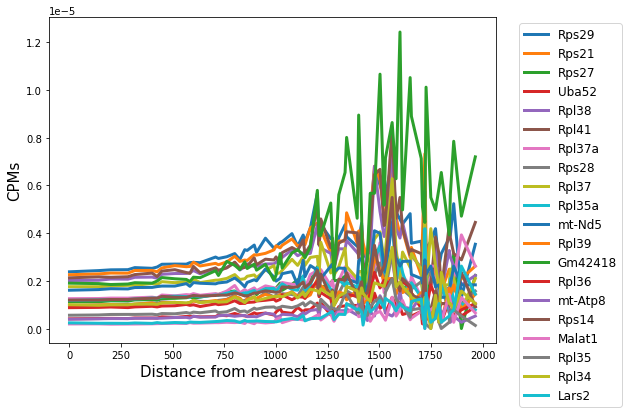

In [106]:
fig,ax = plt.subplots(figsize=(8,6))
for v in range(len(vec)):
    plt.plot(unq_dist[:-1], vec.iloc[v], linewidth=3, label=vec.index.values[v])

plt.legend(fontsize=12,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Distance from nearest plaque (um)', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.savefig(s_fig + '/dist_CPMs.svg', transparent=True)
plt.show()

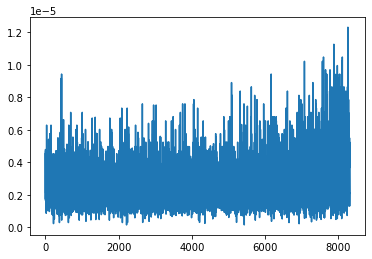

In [79]:
plt.plot(np.arange(0, len(plus_g.values[0])),plus_g.iloc[plus_g.index.values == swp[0]].values[0])
plt.show()

In [108]:
min_c = c_[c_ < 0]
min_p = p_[c_ < 0]
min_g = fin_gene.iloc[c_<0]

In [109]:
min_adjp_s, min_adjp_gene_s = adm.sort_2list(min_p, min_g.index.values)


In [111]:
swp = min_adjp_gene_s[:20]
swp

['Pcp4',
 'Vxn',
 'Hs3st2',
 'Gfap',
 'C4b',
 'Ctsd',
 'Ighm',
 'Hmgcs1',
 'Prkcg',
 'Syngr1',
 'Serpina3n',
 'Ctss',
 'Dkk3',
 'Diras2',
 'C1qb',
 'Lgals3bp',
 'Rap1gds1',
 'Ctsz',
 'Myl4',
 'Sulf2']

In [112]:
min_fin = pd.DataFrame()
for s in swp:
    now = min_g.loc[s]
    min_fin = pd.concat([min_fin, now], axis=1)
min_fin = min_fin.T

In [113]:
#Split sort_dist into 20 bins 
unq_dist = np.unique(sort_dist)
bins = np.unique(sort_dist, return_index=True)[1]

bins

array([   0,  833, 2458, 3326, 4042, 4904, 5253, 5557, 5960, 6319, 6465,
       6669, 6782, 6960, 7194, 7288, 7383, 7452, 7535, 7568, 7629, 7687,
       7763, 7810, 7837, 7905, 7939, 7969, 8001, 8030, 8042, 8089, 8109,
       8118, 8136, 8148, 8162, 8171, 8180, 8200, 8208, 8215, 8221, 8228,
       8240, 8243, 8245, 8251, 8254, 8258, 8262, 8268, 8269, 8275, 8277,
       8281, 8286, 8289, 8293, 8297, 8298, 8301, 8302, 8305, 8307, 8308,
       8310, 8312, 8313, 8314, 8316])

In [114]:
start=0
vec = pd.DataFrame()
for x,b in enumerate(bins[:-1]):
    start=bins[x]
    end=bins[x+1]
    cod = np.mean(min_fin.iloc[:,start:end],axis=1)
    vec = pd.concat([vec, cod], axis=1)




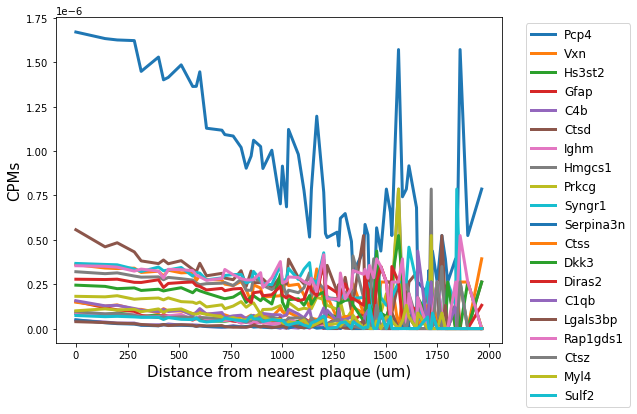

In [115]:
fig,ax = plt.subplots(figsize=(8,6))
for v in range(len(vec)):
    plt.plot(unq_dist[:-1], vec.iloc[v], linewidth=3, label=vec.index.values[v])

plt.legend(fontsize=12,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Distance from nearest plaque (um)', fontsize=15)
plt.ylabel('CPMs', fontsize=15)
plt.savefig(s_fig + '/dist_CPMs-neg.svg', transparent=True)
plt.show()

In [144]:
sort_dist, sort_name =adm.sort_2list(cort_lab['dist'], cort_lab.index.values)

In [24]:
# pearson r and p value 
import scipy.stats as stats
p_ = []
for i in range(_gene.shape[0]):
    p_ = np.append(p_, stats.pearsonr(_counts, gene_norm[i])[1])


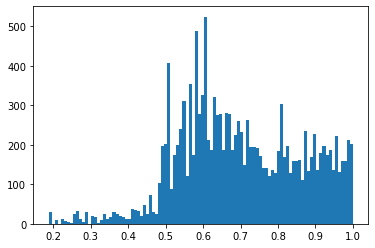

In [45]:
plt.hist(adj_p_vals, bins=100)
plt.show() 

In [49]:
adj_p_vals<0.2

29

In [44]:
import scipy
import mne
# Wilcoxon signed rank test

# sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_, 0.05, 'indep') #Use Benjamini hochberg FDR test 


In [33]:
sum(sig_v)

0

In [12]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'plq0', 'plq1'


In [16]:
samp_unq = np.unique(cort_lab['sample'].values)
samp_unq

array(['030-B', '030-C', '030-D', '040-A', '040-C', '040-D', '109-A',
       '109-C', '109-D'], dtype=object)

In [18]:
for name in sub_ID:
    for p in range(2):
        curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['plaque']==p))])

In [20]:
pd.DataFrame(curr_samp, columns=[name+'_'+plq_name[p]])

,040-D_plq1
Xkr4,1.0
Gm19938,3.0
Sox17,3.0
Mrpl15,40.0
Lypla1,36.0
...,...
Vamp7,30.0
Spry3,9.0
Tmlhe,2.0
CAAA01147332.1,0.0


In [21]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'plq0', 'plq1'


bulk_gene=pd.DataFrame()
bulk_lab = pd.DataFrame()
for name in sub_ID:
    for p in range(2):
        curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['plaque']==p))])
        curr_samp = pd.DataFrame(curr_samp, columns=[name+'_'+plq_name[p]])
        if sum(curr_samp.values) == 0: continue
        bulk_gene = pd.concat([bulk_gene, curr_samp], axis=1)
        curr_lab = cort_lab.iloc[np.where((name == cort_lab['sample'].values)  & (cort_lab['plaque']==p))].iloc[0]
        bulk_lab = pd.concat([bulk_lab, curr_lab], axis=1)

#change order of columns in bulk_gene
bulk_lab = bulk_lab.T
bulk_lab = bulk_lab[['sample', 'sex', 'plaque']]
#replace bulk_lab index names with sample names from bulk_gene
bulk_lab.index = bulk_gene.columns.values

bulk_lab['plaque'][bulk_lab['plaque'] == 0] = 'plq0'
bulk_lab['plaque'][bulk_lab['plaque'] == 1] = 'plq1'

In [33]:
#Sum over each sample
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'adj0', 'adj1'


bulk_gene=pd.DataFrame()
bulk_lab = pd.DataFrame()
for name in sub_ID:
    for p in range(2):
        if p == 0: 
            curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['adj']==p) & (cort_lab['plaque']==0))])
        else:
            curr_samp = np.sum(cort_gene.iloc[np.where((name == cort_lab['sample'].values) & (cort_lab['adj']==p))])
        curr_samp = pd.DataFrame(curr_samp, columns=[name+'_'+plq_name[p]])
        if sum(curr_samp.values) == 0: continue
        bulk_gene = pd.concat([bulk_gene, curr_samp], axis=1)
        curr_lab = cort_lab.iloc[np.where((name == cort_lab['sample'].values)  & (cort_lab['adj']==p))].iloc[0]
        bulk_lab = pd.concat([bulk_lab, curr_lab], axis=1)

#change order of columns in bulk_gene
bulk_lab = bulk_lab.T
bulk_lab = bulk_lab[['sample', 'sex', 'adj']]
#replace bulk_lab index names with sample names from bulk_gene
bulk_lab.index = bulk_gene.columns.values

bulk_lab['adj'][bulk_lab['adj'] == 0] = 'adj0'
bulk_lab['adj'][bulk_lab['adj'] == 1] = 'adj1'

In [30]:
#Pseudobulk by region
cort_ind = ['Cortex L' in lab['cluster'].values[i] for i in range(len(lab['cluster'].values))]
cort_lab = lab[cort_ind]
cort_gene = gene_all.T[cort_ind]
unq_cort = np.unique(cort_lab['cluster'].values)
plq_name = 'plq0', 'plq1'

bulk_gene=pd.DataFrame()
bulk_lab = pd.DataFrame()
for name in sub_ID:
    for u in unq_cort:
        for p in range(2):
            curr_samp = np.sum(cort_gene.iloc[np.where((u == cort_lab['cluster'].values) & (name == cort_lab['sample'].values) & (cort_lab['plaque']==p))])
            curr_samp = pd.DataFrame(curr_samp, columns=[name+'_'+u+'_'+plq_name[p]])
            if sum(curr_samp.values) == 0: continue
            bulk_gene = pd.concat([bulk_gene, curr_samp], axis=1)
            curr_lab = cort_lab.iloc[np.where((u == cort_lab['cluster'].values) & (name == cort_lab['sample'].values)  & (cort_lab['plaque']==p))].iloc[0]
            bulk_lab = pd.concat([bulk_lab, curr_lab], axis=1)

#change order of columns in bulk_gene
bulk_lab = bulk_lab.T
bulk_lab = bulk_lab[['sample', 'cluster', 'sex', 'plaque']]
#replace bulk_lab index names with sample names from bulk_gene
bulk_lab.index = bulk_gene.columns.values

bulk_lab['plaque'][bulk_lab['plaque'] == 0] = 'plq0'
bulk_lab['plaque'][bulk_lab['plaque'] == 1] = 'plq1'

In [483]:
nplq_m = bulk_gene.T[bulk_lab['plaque']=='plq0']
plq_m = bulk_gene.T[bulk_lab['plaque']=='plq1']
nplq_m.shape, plq_m.shape

((45, 14074), (36, 14074))

In [493]:
plq_m.columns.values

array(['Xkr4', 'Gm19938', 'Sox17', ..., 'Tmlhe', 'CAAA01147332.1',
       'AC149090.1'], dtype=object)

In [34]:
#write to csv
bulk_gene.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_counts.csv', index=True)
bulk_lab.to_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_labels.csv', index=True)

In [56]:
#load in plaque DE genes
plq_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-plaque_DESEQ-pval.csv', index_col=0)
#plq_de_reg = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-p-region_DESEQ-pval.csv', index_col=0)
adj_de = pd.read_csv('/cndd3/dburrows/DATA/spatial_transcriptomics/plaques/DESEQ/old-app-cortex-adj_DESEQ-pval.csv', index_col=0)

In [57]:
plq_de = plq_de
#replace all nans with 1
plq_de['padj'][np.isnan(plq_de['padj'])] = 1
#add name GeneNames to index of plq_de
#put geneid at first column 
plq_de['geneid'] = plq_de.index
plq_de = plq_de[['geneid', 'padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]
plq_de

,geneid,padj,log2FoldChange,baseMean,lfcSE,stat,pvalue
Ctsz,Ctsz,0.007691,0.489762,175.904233,0.098983,4.947941,7.500262e-07
H2-D1,H2-D1,0.014956,0.562289,178.020618,0.121150,4.641247,3.463128e-06
Ly86,Ly86,0.014956,0.823994,70.096807,0.179414,4.592697,4.375542e-06
B2m,B2m,0.016527,0.453402,672.686993,0.100506,4.511172,6.447041e-06
Serpina3n,Serpina3n,0.040789,1.238938,71.682376,0.292290,4.238729,2.247891e-05
...,...,...,...,...,...,...,...
Pdpk1,Pdpk1,0.999991,-0.000040,188.754895,0.097982,-0.000413,9.996707e-01
Mrpl37,Mrpl37,0.999991,-0.000016,72.129944,0.137385,-0.000117,9.999066e-01
Hnrnpa1,Hnrnpa1,0.999991,-0.000008,369.573173,0.069085,-0.000113,9.999097e-01
Cnot4,Cnot4,0.999991,-0.000011,35.059424,0.231332,-0.000049,9.999609e-01


In [58]:
len(tuple(plq_de[plq_de['padj'] < 0.1]['geneid'].values))

10

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

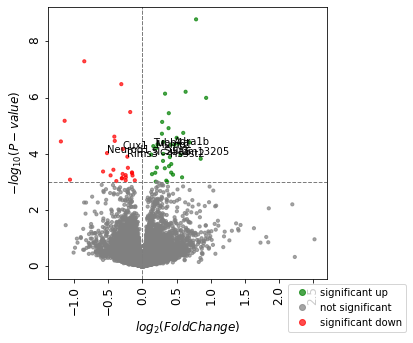

In [40]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=plq_de, lfc='log2FoldChange', pv='pvalue', dim = (5,5), dotsize=10, geneid = 'geneid', genenames = tuple(plq_de[plq_de['padj'] < 0.1]['geneid'].values)[20:30] , valpha = 0.7,gstyle=1, sign_line=True
                             ,show=True,plotlegend=True, legendpos='upper right',legendanchor=(1.30,0), pv_thr = (0.001,0.001), lfc_thr=(0,0), axtickfontsize=12, axlabelfontsize=12, gfont=10, figtype='png')
                            

In [44]:
import scanpy as sc
import decoupler as dc

In [236]:
adj_de['geneid'] = adj_de.index
results_df = adj_de
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,geneid
Gfap,310.159255,0.785246,0.130292,6.026818,1.672192e-09,0.000014,Gfap
Ntn5,55.246878,-0.852681,0.156582,-5.445602,5.163036e-08,0.000215,Ntn5
Lzts3,261.528182,-0.310209,0.060792,-5.102799,3.346672e-07,0.000931,Lzts3
Lgals3bp,87.561806,0.631852,0.126780,4.983851,6.233104e-07,0.001217,Lgals3bp
B2m,968.700621,0.330711,0.066764,4.953442,7.291216e-07,0.001217,B2m
...,...,...,...,...,...,...,...
Me2,35.356811,-0.000050,0.173390,-0.000289,9.997697e-01,NaN,Me2
Ncapd2,25.230450,-0.000051,0.200329,-0.000253,9.997981e-01,NaN,Ncapd2
Bbof1,18.257580,0.000075,0.342431,0.000218,9.998263e-01,NaN,Bbof1
Hist2h3c2,11.751625,-0.000062,0.291705,-0.000212,9.998310e-01,NaN,Hist2h3c2


In [237]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['pvalue'] < 0.05].reset_index()
top_genes['group'] = 'T cell'
len(top_genes)


541

In [147]:
down = dc.get_resource('MSigDB')


In [238]:
msigdb=down
msigdb['collection'].unique()

array(['chemical_and_genetic_perturbations', 'immunesigdb',
       'mirna_targets_mirdb', 'go_molecular_function', 'tf_targets_gtrf',
       'tf_targets_legacy', 'oncogenic_signatures',
       'cell_type_signatures', 'vaccine_response',
       'go_biological_process', 'cancer_gene_neighborhoods',
       'cancer_modules', 'go_cellular_component', 'wikipathways',
       'reactome_pathways', 'hallmark', 'mirna_targets_legacy',
       'biocarta_pathways', 'positional', 'human_phenotype_ontology',
       'pid_pathways', 'kegg_pathways'], dtype=object)

In [239]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='cell_type_signatures']
# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
#msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
31,MAFF,cell_type_signatures,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_RESPIR...
41,MAFF,cell_type_signatures,FAN_OVARY_CL9_PUTATIVE_APOPTOTIC_ENDOTHELIAL_CELL
89,MAFF,cell_type_signatures,FAN_OVARY_CL17_PUTATIVE_APOPTOTIC_SMOOTH_MUSCL...
95,MAFF,cell_type_signatures,ZHENG_CORD_BLOOD_C5_SIMILAR_TO_HSC_C6_PUTATIVE...
97,MAFF,cell_type_signatures,HAY_BONE_MARROW_NK_CELLS
...,...,...,...
3837652,KDM5D,cell_type_signatures,HE_LIM_SUN_FETAL_LUNG_C7_PROLIFERATING_SCHWANN...
3837919,PRSS3P2,cell_type_signatures,MURARO_PANCREAS_ACINAR_CELL
3838132,GSTT1,cell_type_signatures,CUI_DEVELOPING_HEART_COMPACT_VENTRICULAR_CARDI...
3838235,GSTT1,cell_type_signatures,FAN_EMBRYONIC_CTX_BIG_GROUPS_CAJAL_RETZIUS


In [240]:
#make all gene names uppercase
top_genes = top_genes.drop(columns=['index'])
top_genes['geneid'] = [name.upper() for name in top_genes['geneid'].values]


In [241]:
# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    groupby='group',
    features='geneid',
    source='geneset',
    target='genesymbol',
    min_n=5
)

enr_pvals

,AIZARANI_LIVER_C10_MVECS_1,AIZARANI_LIVER_C13_LSECS_2,AIZARANI_LIVER_C18_NK_NKT_CELLS_5,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,AIZARANI_LIVER_C20_LSECS_3,AIZARANI_LIVER_C21_STELLATE_CELLS_1,AIZARANI_LIVER_C23_KUPFFER_CELLS_3,AIZARANI_LIVER_C24_EPCAM_POS_BILE_DUCT_CELLS_3,AIZARANI_LIVER_C25_KUPFFER_CELLS_4,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,...,ZHONG_PFC_C3_ASTROCYTE,ZHONG_PFC_C3_MICROGLIA,ZHONG_PFC_C4_PTGDS_POS_OPC,ZHONG_PFC_C7_ORG_UNDERGOING_NEURONAL_DIFFERENTIATION,ZHONG_PFC_C8_UNKNOWN_NEUROD2_POS_INTERNEURON,ZHONG_PFC_C9_ORG_OTHER,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,ZHONG_PFC_MAJOR_TYPES_NPCS,ZHONG_PFC_MAJOR_TYPES_OPC
T cell,1.735782e-27,3.603834e-21,1.933360e-16,7.264987e-15,1.735782e-27,1.933360e-16,4.551625e-29,7.264987e-15,3.603834e-21,3.812824e-10,...,2.112292e-35,0.0,2.724986e-13,2.724986e-13,9.520327e-23,2.724986e-13,0.0,0.0,1.020237e-11,1.361693e-19


In [242]:
#short all column names
#rename each column in loop
for i in range(len(enr_pvals.columns)):
    #change column name
    enr_pvals.rename(columns={enr_pvals.columns[i]:enr_pvals.columns[i].split('_')[-3] + '_' + enr_pvals.columns[i].split('_')[-2]+ '_' + enr_pvals.columns[i].split('_')[-1]},inplace=True)

# Set 0s to min p-value
enr_pvals.values[enr_pvals.values == 0] = np.min(enr_pvals.values[enr_pvals.values != 0])

# Log-transform
enr_pvals = -np.log10(enr_pvals)

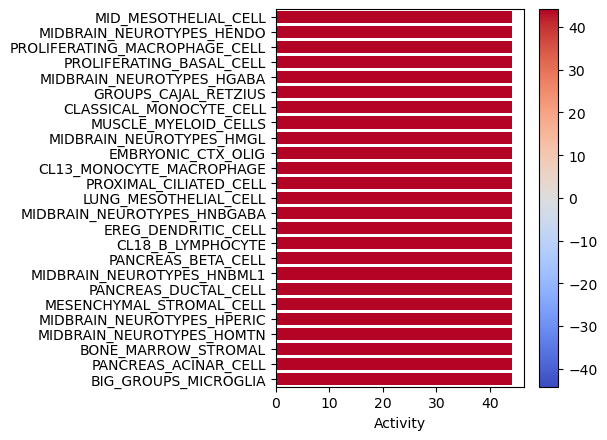

In [243]:
#change size
dc.plot_barplot(enr_pvals, 'T cell', top=25, vertical=True, figsize=(4,5))
plt.savefig(s_fig + 'GO_2.svg', transparent=True, format='svg', dpi=300)

## Whole slice


In [15]:
gene_m.shape, rows.shape

((3552, 16805), (3552,))

In [542]:
# Find DE genes

umi_plq = coord_df['barcode'][coord_df['in_tissue']==1][plq_bool]
umi_norm = coord_df['barcode'][coord_df['in_tissue']==1][plq_bool==False]

geneplq_m = np.vstack([gene_m[np.asarray(umi_plq)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_plq)))])
genenorm_m = np.vstack([gene_m[np.asarray(umi_norm)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_norm)))])
geneplq_m.shape, umi_plq.shape, genenorm_m.shape, umi_norm.shape

import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(geneplq_m[:,i], genenorm_m[:,i]) for i in range(gene_m.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
sig_genes = gene_.var.index[sig_v]


In [543]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(geneplq_m[:,i]) - np.mean(genenorm_m[:,i])) for i in range(gene_m.shape[1])])
lgf2[np.isnan(lgf2)] = 0
value1 = np.asarray([np.mean(genenorm_m[:,i]) for i in range(gene_m.shape[1])])
value2 = np.asarray([np.mean(geneplq_m[:,i]) for i in range(gene_m.shape[1])])
df = {'GeneNames': np.array(gene_.var.index), 'value1': value1, 'value2':value2, 'log2FC': lgf2, 'p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]

df


<ipython-input-543-7670b90127a2>:2: RuntimeWarning: invalid value encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(geneplq_m[:,i]) - np.mean(genenorm_m[:,i])) for i in range(gene_m.shape[1])])


,GeneNames,value1,value2,log2FC,p-value
0,Xkr4,1.594261,1.034647,0.000000,9.445994e-01
1,Gm19938,0.971128,2.124656,0.206052,2.717138e-02
2,Sox17,5.309881,7.096316,0.837084,5.003480e-02
3,Mrpl15,41.813095,53.725334,3.574373,1.055117e-02
4,Lypla1,29.717205,40.485680,3.428742,2.820086e-03
...,...,...,...,...,...
16800,Spry3,9.515156,15.462439,2.572231,2.113764e-03
16801,Tmlhe,2.927776,5.302159,1.247553,9.931781e-04
16802,CAAA01147332.1,0.511697,0.863103,-1.508787,3.150635e-01
16803,AC149090.1,210.750290,203.011078,0.000000,2.866477e-01


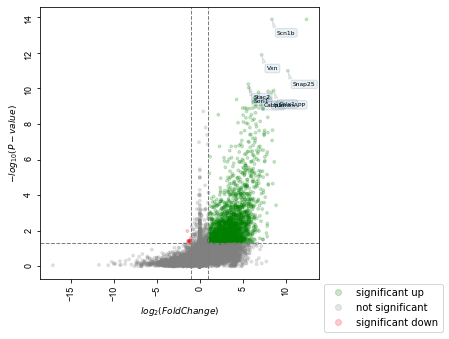

In [544]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe

visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', geneid = 'GeneNames', valpha = 0.2, genenames = tuple(top_n),gstyle=2, sign_line=True
                             ,plotlegend=True, legendpos='upper right',legendanchor=(1.46,0), show=True)
                            

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


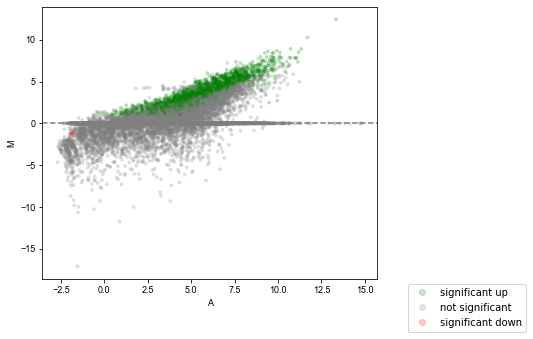

In [521]:
visuz.GeneExpression.ma(df=df, lfc='log2FC', ct_count='value1', st_count = 'value2',pv='p-value', valpha = 0.2, plotlegend=True, legendpos='upper right',legendanchor=(1.46,0),show=True)


In [373]:
# Visualise different DE gene expression in space
curr = 'Cd63'
if curr not in sig_genes:
    print('not a DE gene')
else:
    gene_ind = np.where(gene_.var.index== curr)[0][0]

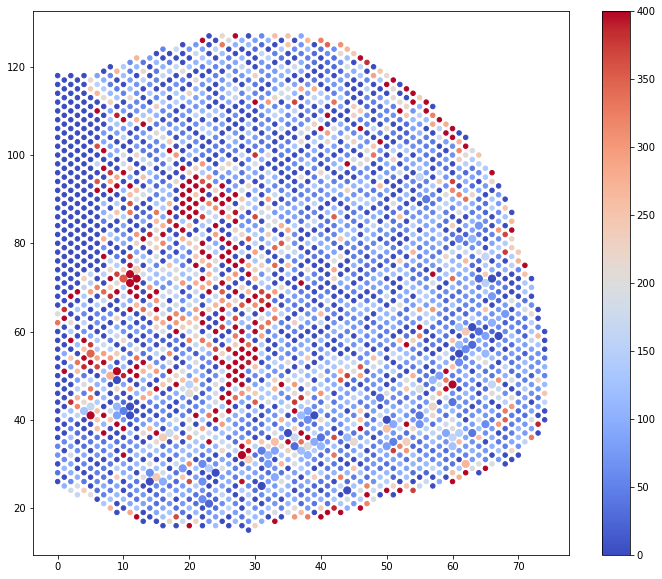

In [374]:

fig = plt.figure(figsize=(12,10))
plt.scatter(rows[plq_bool ==False], cols[plq_bool == False], s=20,c=genenorm_m[:,gene_ind], cmap='coolwarm', vmin = 0, vmax = 400)
plt.scatter(rows[plq_bool ==True], cols[plq_bool == True], s=50, c=geneplq_m[:,gene_ind], cmap='coolwarm', vmin = 0, vmax = 400)
plt.colorbar()
#plt.legend()
plt.savefig('fig_dump/plaque-cd63.png', transparent=True)
plt.show()

## Clusters


In [238]:
# Group by cluster region
def match(curr_umi, umi_plq, umi_norm):
    curr_plq = np.intersect1d(umi_plq,curr_umi)
    curr_norm = np.intersect1d(umi_norm,curr_umi)
    return(curr_norm, curr_plq)

umi_plq = coord_df['barcode'][coord_df['in_tissue']==1][plq_bool]
umi_norm = coord_df['barcode'][coord_df['in_tissue']==1][plq_bool==False]
umi_split_l = [match(clust_l[i], umi_plq, umi_norm) for i in range(len(clust_l))]

In [132]:
#Select cluster 
#Only do DE on clusters with > 5 spots with plaques
for i in range(len(umi_split_l)):
    print('clust ' + str(i) + ' n-plaques=' + str(len(umi_split_l[i][1])))
        


clust 0 n-plaques=4
clust 1 n-plaques=0
clust 2 n-plaques=4
clust 3 n-plaques=16
clust 4 n-plaques=1
clust 5 n-plaques=3
clust 6 n-plaques=46
clust 7 n-plaques=0
clust 8 n-plaques=8
clust 9 n-plaques=13
clust 10 n-plaques=1
clust 11 n-plaques=1
clust 12 n-plaques=6
clust 13 n-plaques=1
clust 14 n-plaques=0


In [350]:
# choose cluster
ch = 6
umi_norm = umi_split_l[ch][0]
umi_plq = umi_split_l[ch][1]
geneplq_m = np.vstack([gene_m[np.asarray(umi_plq)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_plq)))])
genenorm_m = np.vstack([gene_m[np.asarray(umi_norm)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_norm)))])
geneplq_m.shape, genenorm_m.shape

((46, 16805), (246, 16805))

In [351]:
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(geneplq_m[:,i], genenorm_m[:,i]) for i in range(gene_m.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
sig_genes = gene_.var.index[sig_v]


In [352]:
np.sort(sig_genes)


array(['Gm19522'], dtype=object)

In [545]:
# Group by cortical regions (3,6,8,9)
cort_l = [3,6,8,9]
ch = 3
umi_norm = np.hstack(([umi_split_l[i][0] for i in cort_l]))
umi_plq = np.hstack(([umi_split_l[i][1] for i in cort_l]))
geneplq_m = np.vstack([gene_m[np.asarray(umi_plq)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_plq)))])
genenorm_m = np.vstack([gene_m[np.asarray(umi_norm)[i] == gene_.obs.index] for i in range(len(np.asarray(umi_norm)))])
geneplq_m.shape, genenorm_m.shape

((83, 16805), (1068, 16805))

In [546]:
import scipy
# Wilcoxon signed rank test
mwu = ([scipy.stats.mannwhitneyu(geneplq_m[:,i], genenorm_m[:,i]) for i in range(gene_m.shape[1])])
p_vals = np.vstack(mwu)[:,1]
# sig_ = p_vals < 0.05/gene_m.shape[1]
sig_v, adj_p_vals = mne.stats.fdr_correction(p_vals, 0.05, 'indep') #Use Benjamini hochberg FDR test 
sig_genes = gene_.var.index[sig_v]


In [547]:
#Volcano plot
lgf2 = np.asarray([np.log2(np.mean(geneplq_m[:,i]) - np.mean(genenorm_m[:,i])) for i in range(gene_m.shape[1])])
lgf2[np.isnan(lgf2)] = 0
value1 = np.asarray([np.mean(genenorm_m[:,i]) for i in range(gene_m.shape[1])])
value2 = np.asarray([np.mean(geneplq_m[:,i]) for i in range(gene_m.shape[1])])
df = {'GeneNames': np.array(gene_.var.index), 'value1': value1, 'value2':value2, 'log2FC': lgf2, 'adjusted p-value': adj_p_vals}
df = pd.DataFrame(df)

#Find top n DE genes
sorted = np.sort(adj_p_vals)[:10]
top_n = [df['GeneNames'].iloc[np.where(adj_p_vals == i)[0][0]] for i in sorted]

df


<ipython-input-547-e8d7026e9826>:2: RuntimeWarning: invalid value encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(geneplq_m[:,i]) - np.mean(genenorm_m[:,i])) for i in range(gene_m.shape[1])])
<ipython-input-547-e8d7026e9826>:2: RuntimeWarning: divide by zero encountered in log2
  lgf2 = np.asarray([np.log2(np.mean(geneplq_m[:,i]) - np.mean(genenorm_m[:,i])) for i in range(gene_m.shape[1])])


,GeneNames,value1,value2,log2FC,adjusted p-value
0,Xkr4,1.546096,1.296426,0.000000,0.969011
1,Gm19938,1.306514,2.662219,0.439044,0.630130
2,Sox17,5.139546,5.154336,-6.079228,0.915314
3,Mrpl15,46.013012,60.985088,3.904202,0.125666
4,Lypla1,35.458939,45.381691,3.310740,0.435866
...,...,...,...,...,...
16800,Spry3,10.930652,14.435506,1.809354,0.633908
16801,Tmlhe,2.603630,6.070763,1.793743,0.169329
16802,CAAA01147332.1,0.781406,1.081479,-1.736617,0.915314
16803,AC149090.1,245.203796,226.067413,0.000000,0.795985


<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


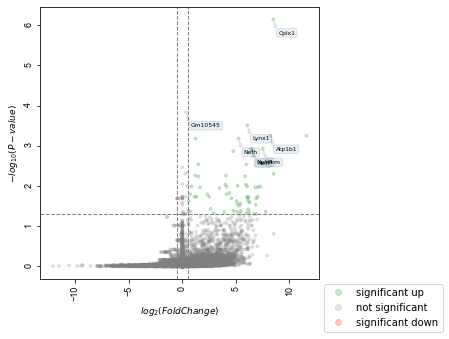

In [552]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe

visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='adjusted p-value', geneid = 'GeneNames', lfc_thr=(0.5,0.5), valpha = 0.2, genenames = tuple(top_n),gstyle=2, sign_line=True
                             ,plotlegend=True, legendpos='upper right',legendanchor=(1.46,0), show=True)
                            

/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/colors.py:1310: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/matplotlib/ticker.py:536: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


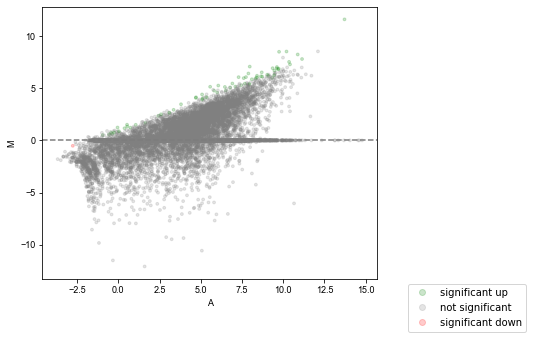

In [555]:
visuz.GeneExpression.ma(df=df, lfc='log2FC', ct_count='value1', st_count = 'value2',pv='adjusted p-value', lfc_thr=(0.5,0.5), valpha = 0.2, plotlegend=True, legendpos='upper right',legendanchor=(1.46,0),show=True)


In [270]:
np.sort(sig_genes)

array(['Abcd2', 'Accsl', 'Acot7', 'Ankrd66', 'Atp1a3', 'Atp1b1', 'Atp5b',
       'Atp5g3', 'Atp6ap2', 'Bcat1', 'Bcl6', 'Camk2a', 'Catip', 'Cd1d1',
       'Ckb', 'Col4a4', 'Colec11', 'Cox5a', 'Cplx1', 'Crip2', 'Ddn',
       'Dynll2', 'Epop', 'Epx', 'Ermard', 'Fanci', 'Fezf2', 'Gas2l3',
       'Gas5', 'Gbx1', 'Glrb', 'Gm10545', 'Gm17396', 'Gm20751', 'Gm2762',
       'Gm29737', 'Gm47814', 'Haghl', 'Hapln4', 'Hcn2', 'Hpcal4',
       'Ifi207', 'Ifitm6', 'Ina', 'Kcna2', 'Kctd9', 'Ldhb', 'Lipc',
       'Lynx1', 'Map1b', 'Marcks', 'Nat8l', 'Ndufc2', 'Nefh', 'Nefl',
       'Nefm', 'Nell1', 'Nrip3', 'Olfm1', 'Pcp4', 'Pde6c', 'Pde6g',
       'Peg13', 'Pkm', 'Pphln1', 'Psph', 'Pvalb', 'Pygm', 'Qrfpr',
       'Rasgef1a', 'Ripply3', 'Scn1b', 'Scn4b', 'Slpi', 'Smad3', 'Sorl1',
       'Stmn3', 'Sub1', 'Syt2', 'Tecr', 'Teddm3', 'Thy1', 'Tmem74bos',
       'Tshz2', 'Tubb3', 'Vamp1', 'Zdhhc15', 'Zfyve9', 'humanAPP'],
      dtype=object)

In [285]:
# Visualise different DE gene expression
curr = 'humanAPP'
if curr not in sig_genes:
    print('not a DE gene')
else:
    gene_ind = np.where(gene_.var.index== curr)[0][0]

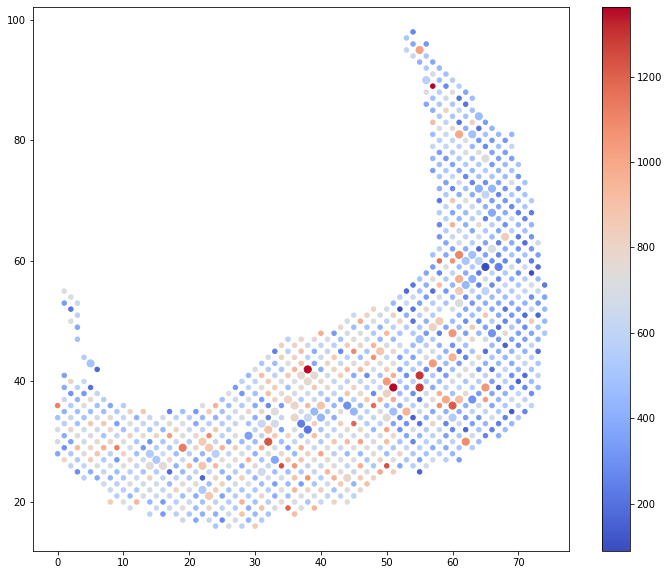

In [286]:
cort_l = [3,6,8,9]

fig = plt.figure(figsize=(12,10))
curr_plq_ind = np.intersect1d(np.hstack([row_ind[x] for x in cort_l]) , np.where(plq_bool == True)[0])
curr_norm_ind = np.intersect1d(np.hstack([row_ind[x] for x in cort_l]) , np.where(plq_bool == False)[0])

plt.scatter(rows[curr_norm_ind], cols[curr_norm_ind], s=20,c=genenorm_m[:,gene_ind], cmap='coolwarm')#, vmin = 0, vmax = 400)
plt.scatter(rows[curr_plq_ind], cols[curr_plq_ind], s=50, c=geneplq_m[:,gene_ind], cmap='coolwarm')#, vmin = 0, vmax = 400)
plt.colorbar()
#plt.legend()
plt.savefig('fig_dump/plaque-cortex-humanAPP.png', transparent=True)
plt.show()

In [131]:
sig_genes

Index(['Atp1b1', 'Zfyve9', 'Cplx1', 'Thy1', 'Pkm', 'Nefh', 'Pde6g', 'Nefm',
       'Nefl', 'Sub1', 'Lynx1', 'Pphln1', 'Gm10545', 'Ina'],
      dtype='object')

# Plaque micro-environment

In [250]:
name

'V10S15_040-D'

In [281]:
#group data together for DESEQ
# Plaque vs no plaque
name_l = ID
drop = [] #genes with < 10 counts in a single sample to drop

#Pull out sex and time for each sample
sex_l = [meta['sex'][meta['sample_name'] == i].values[0] for i in sub_ID]
x = 1
spot_df, gene_df = run_(ID[x], sub_ID[x])
sample = np.full(len(spot_df), sub_ID[x])
sex = np.full(len(spot_df), sex_l[x])
spot_df['sample'] = sample
spot_df['sex'] = sex
spot_df['adj'] = np.zeros(len(spot_df))
adj_ind = adj(spot_df)
spot_df['adj'].iloc[adj_ind] = 1


/home/dburrows/anaconda3/envs/py_3916/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of spots: 3397
Number of genes: 32284


<ipython-input-281-cfc57f932dea>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_df['adj'].iloc[adj_ind] = 1


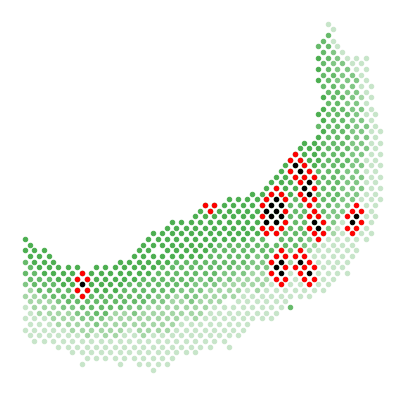

In [284]:
plq_coords = spot_df[spot_df['plaque']==1]['array_row'].values, spot_df[spot_df['plaque']==1]['array_col'].values
nplq_coords = spot_df[spot_df['plaque']==0]['array_row'].values, spot_df[spot_df['plaque']==0]['array_col'].values
adj_coords =spot_df[spot_df['adj']==1]['array_row'].values, spot_df[spot_df['adj']==1]['array_col'].values

fig,ax = plt.subplots(figsize=(7,7))
for x in range(len(sort_clust[:5])): 
    curr_ = spot_df.iloc[np.where(spot_df['cluster'] == sort_clust[x])]
    plt.scatter(curr_['array_row'].values,curr_['array_col'].values, s=20, color = sort_col[x], alpha=1)

    plt.scatter(curr_['array_row'][curr_['adj']==1], curr_['array_col'][curr_['adj']==1], c = 'r', s=20)
    plt.scatter(curr_['array_row'][curr_['plaque']==1],curr_['array_col'][curr_['plaque']==1], c = 'k', s=20)


#remove all borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.savefig(s_fig + 'cluster-adj-plq.svg', transparent=True)
plt.show()


In [ ]:
#